# Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015


## Assignment
Here is the text for the assignment linked to

## Status
Solution Part 1 igang,
    nået til opgave 7
   

## Solution part 1

In [1]:
import numpy as np
import csv
import json
%matplotlib notebook
import matplotlib.pyplot as plt
file = '../data/befkbhalderstatkode.csv'
file2 = '../data/befkbh_stat_code.json'

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1+2
data = np.genfromtxt(file, delimiter=',', dtype=np.uint, skip_header=1)
with open(file2) as json_file:
    dd = json.load(json_file)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
#print(data)

In [3]:
# 3
beboere = {}
for x in neighb:
    mask = ((data[:,0] == 2015) & (data[:,1] == x))
    maskSum =(data[mask][0:,4].sum())
    beboere[neighb[x]] = maskSum
beboere    


{'Indre By': 51937,
 'Østerbro': 75113,
 'Nørrebro': 78802,
 'Vesterbro/Kgs. Enghave': 61623,
 'Valby': 51727,
 'Vanløse': 39537,
 'Brønshøj-Husum': 43908,
 'Bispebjerg': 53604,
 'Amager Øst': 55205,
 'Amager Vest': 64967,
 'Udenfor': 3872}

In [4]:
# 4
sorted_tuples = sorted(beboere.items(), key=lambda item: item[1])
beboere_sorted = {}

for x,y in sorted_tuples:
    beboere_sorted[x] = y

<IPython.core.display.Javascript object>


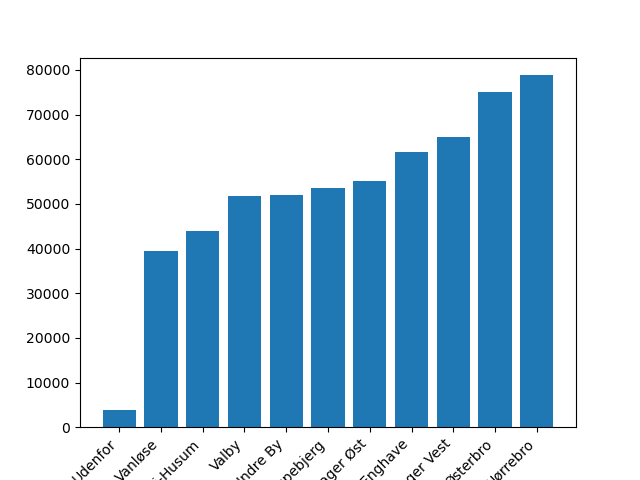

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

In [5]:
plt.bar(list(beboere_sorted), list(beboere_sorted.values()), align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')


In [6]:
# 5
mask = ((data[:,0] == 2015) & (data[:,2] > 65))
old_people = (data[mask][0:,4].sum())

print("Beboere over 65 år: ",old_people)

Beboere over 65 år:  55750


In [26]:
# 6
country_codes = dd
nordic_countries = ["Norge","Sverige","Finland","Island","Grønland"]
old_nords = 0

for x,y in country_codes.items():
    if y in nordic_countries:
        print(x,y)
        mask = (data[:,0] == 2015) & (data[:,2] > 65) & (data[:,3] == x)
        old_nords += (data[mask][0:,4].sum())
       
print("Nordiske beboere over 65 år: ",old_nords)

5101 Grønland
5104 Finland
5106 Island
5110 Norge
5120 Sverige
Nordiske beboere over 65 år:  0.0


In [8]:
# 6 dev
country_codes = dd
nordic_countries = ["Norge","Sverige","Finland","Island","Grønland"]
old_nords = 0

for x,y in country_codes.items():
    if y in nordic_countries:
        mask = (data[:,0] == 2015) & (data[:,2] > 65) & (data[:,3] == x)
        old_nords += (data[mask][0:,4].sum())
       
        
print("Nordiske beboere over 65 år: ",old_nords)

Nordiske beboere over 65 år:  0.0


In [9]:
# 7 Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
#mask = (data[])

In [10]:
import sys

def getPopulation(n1,n2,city):
    for x in neighb:
        if neighb[x] == city:
            city = x
    mask = ((data[:,0] >= n1) & (data[:,0] <= n2) & (data[:,1] == city))
    for x in data[mask]:
        print(x)
    return data[mask]

In [11]:
getPopulation(1992,2015,"Valby")

[2015    5    0 5100  696]
[2015    5    0 5103    1]
[2015    5    0 5104    1]
[2015    5    0 5106    6]
[2015    5    0 5110    2]
[2015    5    0 5120    1]
[2015    5    0 5128    1]
[2015    5    0 5130    1]
[2015    5    0 5142    1]
[2015    5    0 5150    2]
[2015    5    0 5154    7]
[2015    5    0 5158    4]
[2015    5    0 5160    1]
[2015    5    0 5170    2]
[2015    5    0 5172    3]
[2015    5    0 5174    1]
[2015    5    0 5180    1]
[2015    5    0 5228    2]
[2015    5    0 5244    2]
[2015    5    0 5269    1]
[2015    5    0 5277    1]
[2015    5    0 5289    3]
[2015    5    0 5306    1]
[2015    5    0 5404    1]
[2015    5    0 5432    5]
[2015    5    0 5436    3]
[2015    5    0 5448    2]
[2015    5    0 5464    1]
[2015    5    0 5472   13]
[2015    5    0 5484    1]
[2015    5    0 5488    1]
[2015    5    0 5607    1]
[2015    5    0 5609    4]
[2015    5    0 5700    1]
[2015    5    0 5716    1]
[2015    5    0 5761    1]
[2015    5    1 5100  682]
[

[2015    5   15 5472    4]
[2015    5   15 5474    1]
[2015    5   15 5488    1]
[2015    5   15 5492    2]
[2015    5   15 5754    1]
[2015    5   15 5756    3]
[2015    5   15 5759    1]
[2015    5   16 5100  375]
[2015    5   16 5120    1]
[2015    5   16 5152    2]
[2015    5   16 5154    1]
[2015    5   16 5158    1]
[2015    5   16 5164    1]
[2015    5   16 5170    4]
[2015    5   16 5172    8]
[2015    5   16 5180    1]
[2015    5   16 5244    1]
[2015    5   16 5289    2]
[2015    5   16 5404    2]
[2015    5   16 5410    1]
[2015    5   16 5432    1]
[2015    5   16 5436    6]
[2015    5   16 5448    1]
[2015    5   16 5472    5]
[2015    5   16 5474    1]
[2015    5   16 5492    2]
[2015    5   16 5756    5]
[2015    5   17 5100  394]
[2015    5   17 5106    1]
[2015    5   17 5110    2]
[2015    5   17 5120    2]
[2015    5   17 5130    3]
[2015    5   17 5152    2]
[2015    5   17 5164    1]
[2015    5   17 5170    4]
[2015    5   17 5172    9]
[2015    5   17 5180    1]
[

[2015    5   27 5302    1]
[2015    5   27 5306    2]
[2015    5   27 5314    1]
[2015    5   27 5354    2]
[2015    5   27 5390    3]
[2015    5   27 5404    1]
[2015    5   27 5432    9]
[2015    5   27 5436    2]
[2015    5   27 5438    3]
[2015    5   27 5448   10]
[2015    5   27 5464   10]
[2015    5   27 5472    7]
[2015    5   27 5474    4]
[2015    5   27 5484    1]
[2015    5   27 5486    2]
[2015    5   27 5492    5]
[2015    5   27 5502    1]
[2015    5   27 5607    1]
[2015    5   27 5609    4]
[2015    5   27 5611    9]
[2015    5   27 5700    4]
[2015    5   27 5704    1]
[2015    5   27 5750    2]
[2015    5   27 5752    1]
[2015    5   27 5754    3]
[2015    5   27 5761    1]
[2015    5   27 5776    1]
[2015    5   27 5778    1]
[2015    5   28 5100  906]
[2015    5   28 5106    8]
[2015    5   28 5110    8]
[2015    5   28 5120   11]
[2015    5   28 5126    1]
[2015    5   28 5128    7]
[2015    5   28 5129    1]
[2015    5   28 5130    2]
[2015    5   28 5134    3]
[

[2015    5   34 5134    3]
[2015    5   34 5140    3]
[2015    5   34 5150   10]
[2015    5   34 5154   12]
[2015    5   34 5156    4]
[2015    5   34 5158    5]
[2015    5   34 5160    1]
[2015    5   34 5164    3]
[2015    5   34 5170    4]
[2015    5   34 5172    7]
[2015    5   34 5174    4]
[2015    5   34 5180    8]
[2015    5   34 5214    2]
[2015    5   34 5231    1]
[2015    5   34 5234    1]
[2015    5   34 5244    2]
[2015    5   34 5246    2]
[2015    5   34 5258    1]
[2015    5   34 5269    1]
[2015    5   34 5277    1]
[2015    5   34 5289    1]
[2015    5   34 5314    2]
[2015    5   34 5316    1]
[2015    5   34 5328    1]
[2015    5   34 5338    1]
[2015    5   34 5366    2]
[2015    5   34 5390    3]
[2015    5   34 5410    1]
[2015    5   34 5414    3]
[2015    5   34 5432    9]
[2015    5   34 5434    2]
[2015    5   34 5436    6]
[2015    5   34 5438    1]
[2015    5   34 5448    3]
[2015    5   34 5464    4]
[2015    5   34 5472   10]
[2015    5   34 5474    5]
[

[2015    5   40 5106    2]
[2015    5   40 5110    4]
[2015    5   40 5120    9]
[2015    5   40 5128    4]
[2015    5   40 5130    2]
[2015    5   40 5152    5]
[2015    5   40 5154    7]
[2015    5   40 5156    3]
[2015    5   40 5158    2]
[2015    5   40 5164    6]
[2015    5   40 5170    5]
[2015    5   40 5172   10]
[2015    5   40 5174    2]
[2015    5   40 5180    7]
[2015    5   40 5182    1]
[2015    5   40 5216    2]
[2015    5   40 5228    1]
[2015    5   40 5244    4]
[2015    5   40 5289    6]
[2015    5   40 5306    1]
[2015    5   40 5318    1]
[2015    5   40 5354    1]
[2015    5   40 5366    1]
[2015    5   40 5390    1]
[2015    5   40 5404    2]
[2015    5   40 5410    1]
[2015    5   40 5436    6]
[2015    5   40 5438    2]
[2015    5   40 5444    1]
[2015    5   40 5448    3]
[2015    5   40 5472    4]
[2015    5   40 5492    3]
[2015    5   40 5607    1]
[2015    5   40 5611    4]
[2015    5   40 5700    1]
[2015    5   40 5704    2]
[2015    5   40 5756    3]
[

[2015    5   48 5180    1]
[2015    5   48 5182    1]
[2015    5   48 5231    1]
[2015    5   48 5234    1]
[2015    5   48 5244    2]
[2015    5   48 5266    1]
[2015    5   48 5289    1]
[2015    5   48 5302    2]
[2015    5   48 5324    1]
[2015    5   48 5390    6]
[2015    5   48 5404    1]
[2015    5   48 5418    1]
[2015    5   48 5436    6]
[2015    5   48 5442    1]
[2015    5   48 5448    1]
[2015    5   48 5472    6]
[2015    5   48 5474    5]
[2015    5   48 5486    2]
[2015    5   48 5492    4]
[2015    5   48 5700    1]
[2015    5   48 5704    1]
[2015    5   48 5754    1]
[2015    5   48 5756    1]
[2015    5   49 5100  567]
[2015    5   49 5104    1]
[2015    5   49 5110    1]
[2015    5   49 5128    2]
[2015    5   49 5130    3]
[2015    5   49 5140    2]
[2015    5   49 5142    1]
[2015    5   49 5150    3]
[2015    5   49 5152    1]
[2015    5   49 5154    3]
[2015    5   49 5162    1]
[2015    5   49 5164    1]
[2015    5   49 5170    4]
[2015    5   49 5172   11]
[

[2015    5   65 5152    2]
[2015    5   65 5156    1]
[2015    5   65 5160    1]
[2015    5   65 5164    1]
[2015    5   65 5170    1]
[2015    5   65 5172    5]
[2015    5   65 5180    2]
[2015    5   65 5282    1]
[2015    5   65 5436    1]
[2015    5   65 5438    2]
[2015    5   65 5472    1]
[2015    5   65 5492    1]
[2015    5   65 5750    1]
[2015    5   65 5754    1]
[2015    5   65 5756    2]
[2015    5   66 5100  341]
[2015    5   66 5103    1]
[2015    5   66 5104    2]
[2015    5   66 5106    1]
[2015    5   66 5120    1]
[2015    5   66 5130    1]
[2015    5   66 5150    1]
[2015    5   66 5152    2]
[2015    5   66 5170    2]
[2015    5   66 5172    4]
[2015    5   66 5390    1]
[2015    5   66 5458    1]
[2015    5   66 5472    4]
[2015    5   66 5484    1]
[2015    5   66 5776    1]
[2015    5   67 5100  396]
[2015    5   67 5110    2]
[2015    5   67 5120    2]
[2015    5   67 5130    1]
[2015    5   67 5150    1]
[2015    5   67 5152    1]
[2015    5   67 5170    1]
[

[2014    5    5 5438    1]
[2014    5    5 5448    1]
[2014    5    5 5464    1]
[2014    5    5 5472    8]
[2014    5    5 5492    3]
[2014    5    5 5609    1]
[2014    5    5 5704    1]
[2014    5    5 5754    1]
[2014    5    5 5756    2]
[2014    5    6 5100  503]
[2014    5    6 5106    1]
[2014    5    6 5120    4]
[2014    5    6 5130    1]
[2014    5    6 5142    1]
[2014    5    6 5150    2]
[2014    5    6 5152    1]
[2014    5    6 5154    2]
[2014    5    6 5170    4]
[2014    5    6 5172    6]
[2014    5    6 5180    2]
[2014    5    6 5202    1]
[2014    5    6 5228    1]
[2014    5    6 5244    3]
[2014    5    6 5262    1]
[2014    5    6 5289    4]
[2014    5    6 5390    1]
[2014    5    6 5418    1]
[2014    5    6 5432    3]
[2014    5    6 5436    6]
[2014    5    6 5438    1]
[2014    5    6 5448    2]
[2014    5    6 5472    2]
[2014    5    6 5474    1]
[2014    5    6 5486    1]
[2014    5    6 5492    2]
[2014    5    6 5611    1]
[2014    5    6 5700    1]
[

[2014    5   24 5404    2]
[2014    5   24 5432    4]
[2014    5   24 5436    2]
[2014    5   24 5438    1]
[2014    5   24 5448   12]
[2014    5   24 5464    4]
[2014    5   24 5472    6]
[2014    5   24 5474    4]
[2014    5   24 5484    2]
[2014    5   24 5492    3]
[2014    5   24 5502    1]
[2014    5   24 5607    2]
[2014    5   24 5609    3]
[2014    5   24 5611    5]
[2014    5   24 5700    2]
[2014    5   24 5754    1]
[2014    5   24 5756    1]
[2014    5   24 5757    1]
[2014    5   24 5776    1]
[2014    5   25 5100  968]
[2014    5   25 5103    1]
[2014    5   25 5104    5]
[2014    5   25 5106    9]
[2014    5   25 5110   13]
[2014    5   25 5120   11]
[2014    5   25 5126    1]
[2014    5   25 5128    5]
[2014    5   25 5130    2]
[2014    5   25 5134    4]
[2014    5   25 5142    3]
[2014    5   25 5150    3]
[2014    5   25 5152    1]
[2014    5   25 5154   17]
[2014    5   25 5156    1]
[2014    5   25 5158    9]
[2014    5   25 5164    4]
[2014    5   25 5170   16]
[

[2014    5   31 5314    2]
[2014    5   31 5318    1]
[2014    5   31 5390    1]
[2014    5   31 5404    2]
[2014    5   31 5414    1]
[2014    5   31 5432   10]
[2014    5   31 5436    3]
[2014    5   31 5438    2]
[2014    5   31 5444    2]
[2014    5   31 5448   13]
[2014    5   31 5458    2]
[2014    5   31 5464    8]
[2014    5   31 5472   14]
[2014    5   31 5474    1]
[2014    5   31 5488    1]
[2014    5   31 5492    4]
[2014    5   31 5502    3]
[2014    5   31 5607    2]
[2014    5   31 5609    5]
[2014    5   31 5611    7]
[2014    5   31 5700    1]
[2014    5   31 5704    1]
[2014    5   31 5724    1]
[2014    5   31 5750    1]
[2014    5   31 5754    1]
[2014    5   31 5756    2]
[2014    5   31 5757    1]
[2014    5   31 5778    2]
[2014    5   32 5100  784]
[2014    5   32 5106    1]
[2014    5   32 5110    6]
[2014    5   32 5120    5]
[2014    5   32 5126    1]
[2014    5   32 5128    4]
[2014    5   32 5130    5]
[2014    5   32 5134    2]
[2014    5   32 5140    2]
[

[2014    5   38 5472   11]
[2014    5   38 5474    1]
[2014    5   38 5482    1]
[2014    5   38 5486    1]
[2014    5   38 5492    5]
[2014    5   38 5502    1]
[2014    5   38 5609    2]
[2014    5   38 5700    3]
[2014    5   38 5704    2]
[2014    5   38 5750    2]
[2014    5   38 5756    1]
[2014    5   39 5100  681]
[2014    5   39 5103    2]
[2014    5   39 5104    1]
[2014    5   39 5106    2]
[2014    5   39 5110    4]
[2014    5   39 5120    8]
[2014    5   39 5128    4]
[2014    5   39 5130    2]
[2014    5   39 5152    5]
[2014    5   39 5154    6]
[2014    5   39 5156    1]
[2014    5   39 5158    2]
[2014    5   39 5164    5]
[2014    5   39 5170    6]
[2014    5   39 5172   11]
[2014    5   39 5174    1]
[2014    5   39 5180   10]
[2014    5   39 5182    1]
[2014    5   39 5216    2]
[2014    5   39 5228    2]
[2014    5   39 5238    1]
[2014    5   39 5244    3]
[2014    5   39 5246    1]
[2014    5   39 5289    6]
[2014    5   39 5306    1]
[2014    5   39 5318    1]
[

[2014    5   46 5158    2]
[2014    5   46 5164    2]
[2014    5   46 5170    5]
[2014    5   46 5172    5]
[2014    5   46 5180    3]
[2014    5   46 5213    1]
[2014    5   46 5222    1]
[2014    5   46 5244    4]
[2014    5   46 5289    2]
[2014    5   46 5410    1]
[2014    5   46 5434    1]
[2014    5   46 5436    5]
[2014    5   46 5438    1]
[2014    5   46 5446    1]
[2014    5   46 5456    4]
[2014    5   46 5472    5]
[2014    5   46 5474    1]
[2014    5   46 5488    1]
[2014    5   46 5492    8]
[2014    5   46 5514    1]
[2014    5   46 5611    1]
[2014    5   46 5700    2]
[2014    5   46 5756    2]
[2014    5   46 5778    1]
[2014    5   47 5100  603]
[2014    5   47 5103    1]
[2014    5   47 5110    3]
[2014    5   47 5120    2]
[2014    5   47 5128    2]
[2014    5   47 5130    3]
[2014    5   47 5140    1]
[2014    5   47 5150    4]
[2014    5   47 5151    1]
[2014    5   47 5152    2]
[2014    5   47 5154    5]
[2014    5   47 5170    3]
[2014    5   47 5172   16]
[

[2014    5   58 5110    2]
[2014    5   58 5120    1]
[2014    5   58 5128    2]
[2014    5   58 5140    1]
[2014    5   58 5142    1]
[2014    5   58 5152    1]
[2014    5   58 5154    3]
[2014    5   58 5158    1]
[2014    5   58 5162    1]
[2014    5   58 5164    1]
[2014    5   58 5170    3]
[2014    5   58 5172    3]
[2014    5   58 5244    4]
[2014    5   58 5432    1]
[2014    5   58 5436    3]
[2014    5   58 5448    3]
[2014    5   58 5458    1]
[2014    5   58 5472    7]
[2014    5   58 5700    1]
[2014    5   58 5750    2]
[2014    5   58 5754    1]
[2014    5   59 5100  381]
[2014    5   59 5103    1]
[2014    5   59 5110    1]
[2014    5   59 5120    2]
[2014    5   59 5130    2]
[2014    5   59 5152    3]
[2014    5   59 5154    2]
[2014    5   59 5164    1]
[2014    5   59 5172    4]
[2014    5   59 5180    2]
[2014    5   59 5202    1]
[2014    5   59 5244    2]
[2014    5   59 5289    1]
[2014    5   59 5404    1]
[2014    5   59 5424    1]
[2014    5   59 5432    1]
[

[2014    5   79 5472    1]
[2014    5   80 5100  142]
[2014    5   80 5104    1]
[2014    5   80 5164    1]
[2014    5   80 5170    1]
[2014    5   80 5172    1]
[2014    5   80 5316    1]
[2014    5   80 5436    1]
[2014    5   80 5444    1]
[2014    5   81 5100  148]
[2014    5   81 5152    1]
[2014    5   81 5172    1]
[2014    5   81 5754    1]
[2014    5   82 5100  128]
[2014    5   82 5128    1]
[2014    5   82 5172    1]
[2014    5   82 5289    1]
[2014    5   82 5436    2]
[2014    5   83 5100  134]
[2014    5   83 5120    1]
[2014    5   83 5152    1]
[2014    5   83 5164    1]
[2014    5   83 5172    2]
[2014    5   83 5410    1]
[2014    5   83 5472    1]
[2014    5   84 5100  127]
[2014    5   84 5104    1]
[2014    5   84 5110    2]
[2014    5   84 5154    1]
[2014    5   84 5172    1]
[2014    5   84 5244    2]
[2014    5   84 5438    1]
[2014    5   85 5100  117]
[2014    5   85 5448    1]
[2014    5   86 5100  113]
[2014    5   86 5152    1]
[2014    5   86 5170    1]
[

[2013    5   10 5128    1]
[2013    5   10 5152    2]
[2013    5   10 5154    1]
[2013    5   10 5158    1]
[2013    5   10 5170    6]
[2013    5   10 5172    8]
[2013    5   10 5182    1]
[2013    5   10 5244    3]
[2013    5   10 5289    2]
[2013    5   10 5404    1]
[2013    5   10 5432    1]
[2013    5   10 5436    7]
[2013    5   10 5438    1]
[2013    5   10 5448    1]
[2013    5   10 5472    3]
[2013    5   10 5474    2]
[2013    5   10 5754    2]
[2013    5   10 5756    1]
[2013    5   11 5100  415]
[2013    5   11 5103    1]
[2013    5   11 5110    1]
[2013    5   11 5130    1]
[2013    5   11 5134    1]
[2013    5   11 5152    2]
[2013    5   11 5154    1]
[2013    5   11 5170    1]
[2013    5   11 5172    7]
[2013    5   11 5244    1]
[2013    5   11 5289    3]
[2013    5   11 5306    1]
[2013    5   11 5366    1]
[2013    5   11 5436    6]
[2013    5   11 5448    2]
[2013    5   11 5464    1]
[2013    5   11 5472    8]
[2013    5   11 5474    2]
[2013    5   11 5611    1]
[

[2013    5   24 5289    1]
[2013    5   24 5316    1]
[2013    5   24 5354    2]
[2013    5   24 5390    5]
[2013    5   24 5404    1]
[2013    5   24 5432    1]
[2013    5   24 5434    1]
[2013    5   24 5436    3]
[2013    5   24 5444    1]
[2013    5   24 5448    8]
[2013    5   24 5456    1]
[2013    5   24 5464    6]
[2013    5   24 5472    5]
[2013    5   24 5474    4]
[2013    5   24 5484    1]
[2013    5   24 5492    3]
[2013    5   24 5607    2]
[2013    5   24 5609    1]
[2013    5   24 5611    6]
[2013    5   24 5700    1]
[2013    5   24 5704    3]
[2013    5   24 5754    1]
[2013    5   24 5756    2]
[2013    5   24 5778    2]
[2013    5   24 5999    1]
[2013    5   25 5100  877]
[2013    5   25 5104    2]
[2013    5   25 5106   12]
[2013    5   25 5110   16]
[2013    5   25 5120   11]
[2013    5   25 5128    6]
[2013    5   25 5130    5]
[2013    5   25 5134    1]
[2013    5   25 5142    4]
[2013    5   25 5152    1]
[2013    5   25 5154    7]
[2013    5   25 5158    4]
[

[2013    5   31 5492    7]
[2013    5   31 5502    1]
[2013    5   31 5607    1]
[2013    5   31 5609    2]
[2013    5   31 5611    3]
[2013    5   31 5700    4]
[2013    5   31 5704    1]
[2013    5   31 5708    1]
[2013    5   31 5716    1]
[2013    5   31 5752    1]
[2013    5   31 5754    2]
[2013    5   31 5756    3]
[2013    5   31 5776    1]
[2013    5   31 5778    3]
[2013    5   32 5100  846]
[2013    5   32 5104    1]
[2013    5   32 5106   10]
[2013    5   32 5110    5]
[2013    5   32 5120    7]
[2013    5   32 5126    2]
[2013    5   32 5128    3]
[2013    5   32 5130    6]
[2013    5   32 5134    2]
[2013    5   32 5140    5]
[2013    5   32 5142    1]
[2013    5   32 5150    8]
[2013    5   32 5154    9]
[2013    5   32 5156    4]
[2013    5   32 5158    4]
[2013    5   32 5160    2]
[2013    5   32 5164    4]
[2013    5   32 5170    6]
[2013    5   32 5172    9]
[2013    5   32 5174    4]
[2013    5   32 5180    7]
[2013    5   32 5214    1]
[2013    5   32 5231    1]
[

[2013    5   38 5404    2]
[2013    5   38 5410    1]
[2013    5   38 5432    2]
[2013    5   38 5436    4]
[2013    5   38 5438    2]
[2013    5   38 5444    1]
[2013    5   38 5448    3]
[2013    5   38 5464    2]
[2013    5   38 5472    4]
[2013    5   38 5488    1]
[2013    5   38 5492    3]
[2013    5   38 5607    1]
[2013    5   38 5611    3]
[2013    5   38 5700    1]
[2013    5   38 5704    2]
[2013    5   38 5750    1]
[2013    5   38 5756    2]
[2013    5   38 5778    2]
[2013    5   39 5100  677]
[2013    5   39 5103    2]
[2013    5   39 5106    2]
[2013    5   39 5110    5]
[2013    5   39 5120    8]
[2013    5   39 5128    3]
[2013    5   39 5130    4]
[2013    5   39 5142    1]
[2013    5   39 5150    3]
[2013    5   39 5152    4]
[2013    5   39 5154   10]
[2013    5   39 5156    1]
[2013    5   39 5158    4]
[2013    5   39 5164    1]
[2013    5   39 5170    7]
[2013    5   39 5172    7]
[2013    5   39 5174    3]
[2013    5   39 5180    3]
[2013    5   39 5202    1]
[

[2013    5   47 5306    1]
[2013    5   47 5314    1]
[2013    5   47 5326    1]
[2013    5   47 5390    1]
[2013    5   47 5410    1]
[2013    5   47 5432    1]
[2013    5   47 5436    6]
[2013    5   47 5456    1]
[2013    5   47 5472    3]
[2013    5   47 5488    1]
[2013    5   47 5492    4]
[2013    5   47 5502    1]
[2013    5   47 5609    1]
[2013    5   47 5611    1]
[2013    5   47 5704    1]
[2013    5   47 5724    1]
[2013    5   47 5750    1]
[2013    5   47 5754    1]
[2013    5   47 5756    1]
[2013    5   48 5100  603]
[2013    5   48 5102    1]
[2013    5   48 5103    1]
[2013    5   48 5110    2]
[2013    5   48 5120    4]
[2013    5   48 5128    3]
[2013    5   48 5130    2]
[2013    5   48 5140    4]
[2013    5   48 5150    2]
[2013    5   48 5152    4]
[2013    5   48 5154    3]
[2013    5   48 5170    4]
[2013    5   48 5172   15]
[2013    5   48 5180    1]
[2013    5   48 5182    1]
[2013    5   48 5222    1]
[2013    5   48 5244    1]
[2013    5   48 5258    1]
[

[2013    5   68 5100  360]
[2013    5   68 5110    2]
[2013    5   68 5140    1]
[2013    5   68 5152    1]
[2013    5   68 5154    1]
[2013    5   68 5158    1]
[2013    5   68 5162    1]
[2013    5   68 5170    1]
[2013    5   68 5172    1]
[2013    5   68 5390    1]
[2013    5   68 5472    2]
[2013    5   68 5756    1]
[2013    5   69 5100  336]
[2013    5   69 5110    3]
[2013    5   69 5120    1]
[2013    5   69 5150    2]
[2013    5   69 5170    1]
[2013    5   69 5172    1]
[2013    5   69 5180    1]
[2013    5   69 5244    1]
[2013    5   69 5390    1]
[2013    5   69 5432    1]
[2013    5   69 5436    1]
[2013    5   69 5444    1]
[2013    5   69 5446    1]
[2013    5   69 5472    1]
[2013    5   69 5754    1]
[2013    5   70 5100  261]
[2013    5   70 5110    1]
[2013    5   70 5152    3]
[2013    5   70 5172    1]
[2013    5   70 5180    1]
[2013    5   70 5182    1]
[2013    5   70 5234    1]
[2013    5   70 5244    1]
[2013    5   70 5472    2]
[2013    5   71 5100  233]
[

[2012    5   10 5154    1]
[2012    5   10 5170    1]
[2012    5   10 5172    7]
[2012    5   10 5244    2]
[2012    5   10 5289    3]
[2012    5   10 5306    1]
[2012    5   10 5366    1]
[2012    5   10 5436    7]
[2012    5   10 5438    1]
[2012    5   10 5448    2]
[2012    5   10 5464    1]
[2012    5   10 5472    8]
[2012    5   10 5474    2]
[2012    5   10 5611    1]
[2012    5   10 5700    1]
[2012    5   10 5754    2]
[2012    5   11 5100  392]
[2012    5   11 5106    1]
[2012    5   11 5110    1]
[2012    5   11 5120    2]
[2012    5   11 5128    1]
[2012    5   11 5152    2]
[2012    5   11 5154    2]
[2012    5   11 5158    1]
[2012    5   11 5170    3]
[2012    5   11 5172    8]
[2012    5   11 5180    3]
[2012    5   11 5202    1]
[2012    5   11 5244    2]
[2012    5   11 5289    1]
[2012    5   11 5436    6]
[2012    5   11 5448    1]
[2012    5   11 5472    4]
[2012    5   11 5474    1]
[2012    5   11 5492    1]
[2012    5   11 5700    1]
[2012    5   11 5704    1]
[

[2012    5   22 5474    3]
[2012    5   22 5484    2]
[2012    5   22 5492    2]
[2012    5   22 5607    1]
[2012    5   22 5609    2]
[2012    5   22 5611    4]
[2012    5   22 5704    1]
[2012    5   22 5757    1]
[2012    5   22 5776    1]
[2012    5   22 5778    4]
[2012    5   23 5100  832]
[2012    5   23 5106    2]
[2012    5   23 5110    7]
[2012    5   23 5120    8]
[2012    5   23 5126    2]
[2012    5   23 5128    3]
[2012    5   23 5130    3]
[2012    5   23 5140    1]
[2012    5   23 5142    1]
[2012    5   23 5150    4]
[2012    5   23 5151    1]
[2012    5   23 5152    3]
[2012    5   23 5154   12]
[2012    5   23 5156    2]
[2012    5   23 5158    6]
[2012    5   23 5160    1]
[2012    5   23 5164    4]
[2012    5   23 5170   14]
[2012    5   23 5172   10]
[2012    5   23 5174    2]
[2012    5   23 5180    8]
[2012    5   23 5182    2]
[2012    5   23 5228    1]
[2012    5   23 5244    1]
[2012    5   23 5269    1]
[2012    5   23 5289    2]
[2012    5   23 5390    4]
[

[2012    5   30 5754    1]
[2012    5   30 5756    3]
[2012    5   30 5778    3]
[2012    5   31 5100  859]
[2012    5   31 5103    1]
[2012    5   31 5104    1]
[2012    5   31 5106    9]
[2012    5   31 5110    6]
[2012    5   31 5120    7]
[2012    5   31 5126    1]
[2012    5   31 5128    2]
[2012    5   31 5130    5]
[2012    5   31 5134    2]
[2012    5   31 5140    4]
[2012    5   31 5142    1]
[2012    5   31 5150    7]
[2012    5   31 5154   10]
[2012    5   31 5156    4]
[2012    5   31 5158    4]
[2012    5   31 5160    1]
[2012    5   31 5164    4]
[2012    5   31 5170    6]
[2012    5   31 5172   10]
[2012    5   31 5174    6]
[2012    5   31 5180   10]
[2012    5   31 5214    1]
[2012    5   31 5231    1]
[2012    5   31 5234    1]
[2012    5   31 5244    1]
[2012    5   31 5289    2]
[2012    5   31 5316    1]
[2012    5   31 5328    1]
[2012    5   31 5366    1]
[2012    5   31 5390    1]
[2012    5   31 5410    2]
[2012    5   31 5414    2]
[2012    5   31 5432   11]
[

[2012    5   40 5172    7]
[2012    5   40 5174    1]
[2012    5   40 5180    5]
[2012    5   40 5240    1]
[2012    5   40 5244    4]
[2012    5   40 5289    2]
[2012    5   40 5295    1]
[2012    5   40 5324    1]
[2012    5   40 5404    1]
[2012    5   40 5432    1]
[2012    5   40 5436    7]
[2012    5   40 5438    4]
[2012    5   40 5442    1]
[2012    5   40 5446    1]
[2012    5   40 5448    3]
[2012    5   40 5456    2]
[2012    5   40 5472    3]
[2012    5   40 5474    2]
[2012    5   40 5488    1]
[2012    5   40 5492    8]
[2012    5   40 5607    1]
[2012    5   40 5609    1]
[2012    5   40 5704    2]
[2012    5   40 5708    1]
[2012    5   40 5754    1]
[2012    5   41 5100  542]
[2012    5   41 5103    1]
[2012    5   41 5104    1]
[2012    5   41 5106    1]
[2012    5   41 5110    1]
[2012    5   41 5120    5]
[2012    5   41 5128    3]
[2012    5   41 5130    4]
[2012    5   41 5140    1]
[2012    5   41 5142    2]
[2012    5   41 5150    5]
[2012    5   41 5152    4]
[

[2012    5   51 5152    2]
[2012    5   51 5154    3]
[2012    5   51 5164    1]
[2012    5   51 5170    7]
[2012    5   51 5172   14]
[2012    5   51 5174    1]
[2012    5   51 5180    4]
[2012    5   51 5182    1]
[2012    5   51 5244    3]
[2012    5   51 5269    2]
[2012    5   51 5277    1]
[2012    5   51 5289    6]
[2012    5   51 5316    1]
[2012    5   51 5356    1]
[2012    5   51 5390    1]
[2012    5   51 5432    1]
[2012    5   51 5436    2]
[2012    5   51 5438    1]
[2012    5   51 5448    1]
[2012    5   51 5472    6]
[2012    5   51 5474    2]
[2012    5   51 5492    2]
[2012    5   51 5611    1]
[2012    5   51 5700    2]
[2012    5   51 5750    1]
[2012    5   51 5754    3]
[2012    5   52 5100  450]
[2012    5   52 5110    3]
[2012    5   52 5120    3]
[2012    5   52 5130    3]
[2012    5   52 5140    1]
[2012    5   52 5152    4]
[2012    5   52 5154    2]
[2012    5   52 5156    1]
[2012    5   52 5164    1]
[2012    5   52 5170    4]
[2012    5   52 5172    4]
[

[2012    5   77 5438    2]
[2012    5   77 5472    1]
[2012    5   77 5754    1]
[2012    5   78 5100  162]
[2012    5   78 5104    1]
[2012    5   78 5164    1]
[2012    5   78 5170    2]
[2012    5   78 5172    1]
[2012    5   78 5316    1]
[2012    5   78 5436    1]
[2012    5   78 5444    1]
[2012    5   78 5448    1]
[2012    5   79 5100  168]
[2012    5   79 5120    1]
[2012    5   79 5152    1]
[2012    5   79 5172    1]
[2012    5   79 5754    1]
[2012    5   80 5100  150]
[2012    5   80 5128    1]
[2012    5   80 5172    1]
[2012    5   80 5289    1]
[2012    5   80 5436    2]
[2012    5   81 5100  160]
[2012    5   81 5120    1]
[2012    5   81 5152    2]
[2012    5   81 5164    1]
[2012    5   81 5172    2]
[2012    5   81 5410    1]
[2012    5   81 5438    1]
[2012    5   81 5472    1]
[2012    5   82 5100  156]
[2012    5   82 5104    1]
[2012    5   82 5110    2]
[2012    5   82 5154    1]
[2012    5   82 5172    1]
[2012    5   82 5244    2]
[2012    5   82 5438    1]
[

[2011    5   14 5170    3]
[2011    5   14 5172    9]
[2011    5   14 5228    1]
[2011    5   14 5244    2]
[2011    5   14 5289    3]
[2011    5   14 5306    1]
[2011    5   14 5404    1]
[2011    5   14 5436    7]
[2011    5   14 5446    1]
[2011    5   14 5448    1]
[2011    5   14 5456    1]
[2011    5   14 5472    2]
[2011    5   14 5474    1]
[2011    5   14 5492    3]
[2011    5   14 5754    1]
[2011    5   14 5756    1]
[2011    5   15 5100  379]
[2011    5   15 5103    1]
[2011    5   15 5106    1]
[2011    5   15 5110    1]
[2011    5   15 5120    1]
[2011    5   15 5140    1]
[2011    5   15 5152    1]
[2011    5   15 5164    1]
[2011    5   15 5170    4]
[2011    5   15 5172    8]
[2011    5   15 5174    1]
[2011    5   15 5180    1]
[2011    5   15 5244    3]
[2011    5   15 5289    6]
[2011    5   15 5306    1]
[2011    5   15 5318    1]
[2011    5   15 5390    1]
[2011    5   15 5436    4]
[2011    5   15 5448    3]
[2011    5   15 5456    1]
[2011    5   15 5472    2]
[

[2011    5   25 5472    6]
[2011    5   25 5474    4]
[2011    5   25 5484    1]
[2011    5   25 5486    1]
[2011    5   25 5492    6]
[2011    5   25 5502    1]
[2011    5   25 5609    1]
[2011    5   25 5611    3]
[2011    5   25 5700    1]
[2011    5   25 5704    2]
[2011    5   25 5716    1]
[2011    5   25 5756    1]
[2011    5   25 5757    2]
[2011    5   25 5778    2]
[2011    5   26 5100  828]
[2011    5   26 5104    2]
[2011    5   26 5106    8]
[2011    5   26 5110    6]
[2011    5   26 5120    5]
[2011    5   26 5128    3]
[2011    5   26 5130    2]
[2011    5   26 5134    1]
[2011    5   26 5140    1]
[2011    5   26 5150    5]
[2011    5   26 5154   14]
[2011    5   26 5156    1]
[2011    5   26 5158    7]
[2011    5   26 5164    4]
[2011    5   26 5170    7]
[2011    5   26 5172   10]
[2011    5   26 5174    4]
[2011    5   26 5180    9]
[2011    5   26 5213    1]
[2011    5   26 5214    1]
[2011    5   26 5228    3]
[2011    5   26 5244    2]
[2011    5   26 5255    2]
[

[2011    5   33 5104    3]
[2011    5   33 5106    3]
[2011    5   33 5110    4]
[2011    5   33 5120    7]
[2011    5   33 5128    2]
[2011    5   33 5130    3]
[2011    5   33 5134    1]
[2011    5   33 5140    1]
[2011    5   33 5142    3]
[2011    5   33 5150    3]
[2011    5   33 5151    1]
[2011    5   33 5152    3]
[2011    5   33 5153    1]
[2011    5   33 5154   10]
[2011    5   33 5156    1]
[2011    5   33 5158    6]
[2011    5   33 5170    8]
[2011    5   33 5172   14]
[2011    5   33 5174    2]
[2011    5   33 5180    3]
[2011    5   33 5182    1]
[2011    5   33 5213    1]
[2011    5   33 5222    1]
[2011    5   33 5244    1]
[2011    5   33 5272    1]
[2011    5   33 5282    1]
[2011    5   33 5295    1]
[2011    5   33 5306    2]
[2011    5   33 5314    1]
[2011    5   33 5318    1]
[2011    5   33 5354    2]
[2011    5   33 5356    1]
[2011    5   33 5390    4]
[2011    5   33 5404    1]
[2011    5   33 5432   10]
[2011    5   33 5436    3]
[2011    5   33 5438    3]
[

[2011    5   43 5213    1]
[2011    5   43 5222    1]
[2011    5   43 5244    3]
[2011    5   43 5289    2]
[2011    5   43 5302    1]
[2011    5   43 5390    1]
[2011    5   43 5410    1]
[2011    5   43 5436    5]
[2011    5   43 5438    1]
[2011    5   43 5446    1]
[2011    5   43 5456    3]
[2011    5   43 5472    8]
[2011    5   43 5474    1]
[2011    5   43 5488    1]
[2011    5   43 5492   10]
[2011    5   43 5700    1]
[2011    5   43 5704    1]
[2011    5   43 5754    1]
[2011    5   43 5756    2]
[2011    5   44 5100  624]
[2011    5   44 5106    1]
[2011    5   44 5110    3]
[2011    5   44 5120    1]
[2011    5   44 5128    1]
[2011    5   44 5130    3]
[2011    5   44 5140    1]
[2011    5   44 5150    4]
[2011    5   44 5151    1]
[2011    5   44 5152    1]
[2011    5   44 5154    4]
[2011    5   44 5170    3]
[2011    5   44 5172   11]
[2011    5   44 5180    2]
[2011    5   44 5202    1]
[2011    5   44 5234    1]
[2011    5   44 5244    4]
[2011    5   44 5289    2]
[

[2011    5   56 5488    1]
[2011    5   56 5492    2]
[2011    5   56 5754    1]
[2011    5   57 5100  433]
[2011    5   57 5104    1]
[2011    5   57 5110    2]
[2011    5   57 5120    4]
[2011    5   57 5130    1]
[2011    5   57 5140    2]
[2011    5   57 5152    3]
[2011    5   57 5158    1]
[2011    5   57 5164    1]
[2011    5   57 5170    1]
[2011    5   57 5172    3]
[2011    5   57 5180    1]
[2011    5   57 5222    1]
[2011    5   57 5244    1]
[2011    5   57 5289    1]
[2011    5   57 5390    1]
[2011    5   57 5432    1]
[2011    5   57 5436    1]
[2011    5   57 5458    1]
[2011    5   57 5472    7]
[2011    5   57 5474    2]
[2011    5   57 5492    1]
[2011    5   57 5611    1]
[2011    5   57 5754    2]
[2011    5   58 5100  398]
[2011    5   58 5106    1]
[2011    5   58 5120    2]
[2011    5   58 5130    1]
[2011    5   58 5150    1]
[2011    5   58 5152    2]
[2011    5   58 5154    1]
[2011    5   58 5160    1]
[2011    5   58 5170    1]
[2011    5   58 5172    4]
[

[2011    5   77 5436    1]
[2011    5   77 5444    1]
[2011    5   77 5448    1]
[2011    5   78 5100  181]
[2011    5   78 5152    2]
[2011    5   78 5172    1]
[2011    5   78 5244    1]
[2011    5   78 5754    1]
[2011    5   79 5100  157]
[2011    5   79 5128    1]
[2011    5   79 5172    1]
[2011    5   79 5289    1]
[2011    5   79 5436    2]
[2011    5   79 5456    1]
[2011    5   80 5100  172]
[2011    5   80 5120    1]
[2011    5   80 5152    4]
[2011    5   80 5164    1]
[2011    5   80 5172    2]
[2011    5   80 5410    1]
[2011    5   80 5438    1]
[2011    5   80 5456    1]
[2011    5   80 5472    1]
[2011    5   81 5100  174]
[2011    5   81 5104    1]
[2011    5   81 5110    2]
[2011    5   81 5154    1]
[2011    5   81 5172    1]
[2011    5   81 5244    2]
[2011    5   81 5436    1]
[2011    5   81 5438    1]
[2011    5   81 5448    1]
[2011    5   81 5474    1]
[2011    5   82 5100  159]
[2011    5   82 5130    1]
[2011    5   82 5158    1]
[2011    5   82 5164    1]
[

[2010    5   16 5244    2]
[2010    5   16 5289    4]
[2010    5   16 5306    1]
[2010    5   16 5410    1]
[2010    5   16 5436    1]
[2010    5   16 5438    2]
[2010    5   16 5446    1]
[2010    5   16 5456    1]
[2010    5   16 5472    2]
[2010    5   16 5474    1]
[2010    5   16 5492    1]
[2010    5   16 5700    1]
[2010    5   16 5756    3]
[2010    5   17 5100  383]
[2010    5   17 5103    1]
[2010    5   17 5106    1]
[2010    5   17 5110    1]
[2010    5   17 5152    5]
[2010    5   17 5160    1]
[2010    5   17 5170    1]
[2010    5   17 5172   14]
[2010    5   17 5174    1]
[2010    5   17 5202    1]
[2010    5   17 5222    1]
[2010    5   17 5244    3]
[2010    5   17 5255    1]
[2010    5   17 5289    4]
[2010    5   17 5404    3]
[2010    5   17 5432    2]
[2010    5   17 5438    1]
[2010    5   17 5448    3]
[2010    5   17 5472    3]
[2010    5   17 5488    1]
[2010    5   17 5492    3]
[2010    5   17 5756    1]
[2010    5   17 5778    1]
[2010    5   18 5100  410]
[

[2010    5   26 5110    6]
[2010    5   26 5120    7]
[2010    5   26 5128    2]
[2010    5   26 5130    2]
[2010    5   26 5134    2]
[2010    5   26 5140    1]
[2010    5   26 5150    2]
[2010    5   26 5152    1]
[2010    5   26 5154   17]
[2010    5   26 5156    2]
[2010    5   26 5158    5]
[2010    5   26 5160    1]
[2010    5   26 5164    4]
[2010    5   26 5170    5]
[2010    5   26 5172   10]
[2010    5   26 5174    1]
[2010    5   26 5180    8]
[2010    5   26 5222    2]
[2010    5   26 5234    1]
[2010    5   26 5244    1]
[2010    5   26 5246    2]
[2010    5   26 5289    2]
[2010    5   26 5328    1]
[2010    5   26 5366    1]
[2010    5   26 5390    1]
[2010    5   26 5404    1]
[2010    5   26 5432    7]
[2010    5   26 5434    1]
[2010    5   26 5436    6]
[2010    5   26 5448    5]
[2010    5   26 5464    3]
[2010    5   26 5472    4]
[2010    5   26 5474    3]
[2010    5   26 5488    1]
[2010    5   26 5492    2]
[2010    5   26 5609    5]
[2010    5   26 5611    2]
[

[2010    5   32 5756    3]
[2010    5   33 5100  861]
[2010    5   33 5103    1]
[2010    5   33 5104    1]
[2010    5   33 5106    3]
[2010    5   33 5110    7]
[2010    5   33 5120    6]
[2010    5   33 5126    1]
[2010    5   33 5128    2]
[2010    5   33 5130    2]
[2010    5   33 5134    2]
[2010    5   33 5140    2]
[2010    5   33 5150    3]
[2010    5   33 5152    2]
[2010    5   33 5154    6]
[2010    5   33 5156    1]
[2010    5   33 5158    3]
[2010    5   33 5164    1]
[2010    5   33 5170    7]
[2010    5   33 5172    7]
[2010    5   33 5174    1]
[2010    5   33 5182    1]
[2010    5   33 5202    1]
[2010    5   33 5228    1]
[2010    5   33 5244    4]
[2010    5   33 5246    2]
[2010    5   33 5262    1]
[2010    5   33 5266    1]
[2010    5   33 5269    1]
[2010    5   33 5289    1]
[2010    5   33 5306    3]
[2010    5   33 5308    1]
[2010    5   33 5328    1]
[2010    5   33 5338    1]
[2010    5   33 5390    2]
[2010    5   33 5404    5]
[2010    5   33 5418    1]
[

[2010    5   42 5180    2]
[2010    5   42 5213    1]
[2010    5   42 5222    1]
[2010    5   42 5244    4]
[2010    5   42 5289    4]
[2010    5   42 5302    1]
[2010    5   42 5410    1]
[2010    5   42 5436    4]
[2010    5   42 5438    2]
[2010    5   42 5446    1]
[2010    5   42 5456    3]
[2010    5   42 5472    7]
[2010    5   42 5474    1]
[2010    5   42 5488    1]
[2010    5   42 5492   12]
[2010    5   42 5700    1]
[2010    5   42 5754    1]
[2010    5   42 5756    2]
[2010    5   42 5778    1]
[2010    5   43 5100  629]
[2010    5   43 5106    1]
[2010    5   43 5110    3]
[2010    5   43 5130    3]
[2010    5   43 5140    1]
[2010    5   43 5150    3]
[2010    5   43 5151    1]
[2010    5   43 5152    2]
[2010    5   43 5154    4]
[2010    5   43 5158    1]
[2010    5   43 5170    3]
[2010    5   43 5172   11]
[2010    5   43 5180    1]
[2010    5   43 5202    1]
[2010    5   43 5234    1]
[2010    5   43 5244    4]
[2010    5   43 5269    1]
[2010    5   43 5272    1]
[

[2010    5   53 5154    5]
[2010    5   53 5156    1]
[2010    5   53 5170    2]
[2010    5   53 5172    6]
[2010    5   53 5180    2]
[2010    5   53 5202    1]
[2010    5   53 5244    4]
[2010    5   53 5266    1]
[2010    5   53 5272    1]
[2010    5   53 5316    1]
[2010    5   53 5318    1]
[2010    5   53 5390    1]
[2010    5   53 5404    1]
[2010    5   53 5436    6]
[2010    5   53 5438    1]
[2010    5   53 5446    1]
[2010    5   53 5448    1]
[2010    5   53 5472    3]
[2010    5   53 5474    2]
[2010    5   53 5492    1]
[2010    5   53 5754    2]
[2010    5   53 5758    1]
[2010    5   54 5100  392]
[2010    5   54 5110    3]
[2010    5   54 5120    2]
[2010    5   54 5140    1]
[2010    5   54 5142    1]
[2010    5   54 5152    1]
[2010    5   54 5154    2]
[2010    5   54 5162    1]
[2010    5   54 5164    1]
[2010    5   54 5170    6]
[2010    5   54 5172    3]
[2010    5   54 5180    1]
[2010    5   54 5244    3]
[2010    5   54 5390    1]
[2010    5   54 5436    3]
[

[2010    5   76 5448    1]
[2010    5   77 5100  196]
[2010    5   77 5152    3]
[2010    5   77 5172    1]
[2010    5   77 5244    1]
[2010    5   77 5436    1]
[2010    5   77 5754    1]
[2010    5   78 5100  168]
[2010    5   78 5128    1]
[2010    5   78 5152    1]
[2010    5   78 5172    2]
[2010    5   78 5289    1]
[2010    5   78 5436    2]
[2010    5   78 5456    1]
[2010    5   78 5754    1]
[2010    5   79 5100  187]
[2010    5   79 5120    1]
[2010    5   79 5152    5]
[2010    5   79 5164    1]
[2010    5   79 5172    2]
[2010    5   79 5438    1]
[2010    5   79 5456    1]
[2010    5   79 5472    1]
[2010    5   80 5100  191]
[2010    5   80 5104    1]
[2010    5   80 5110    2]
[2010    5   80 5152    1]
[2010    5   80 5154    1]
[2010    5   80 5172    1]
[2010    5   80 5244    2]
[2010    5   80 5436    2]
[2010    5   80 5448    1]
[2010    5   80 5474    1]
[2010    5   81 5100  171]
[2010    5   81 5130    1]
[2010    5   81 5158    1]
[2010    5   81 5164    1]
[

[2009    5   11 5213    1]
[2009    5   11 5244    3]
[2009    5   11 5289    4]
[2009    5   11 5316    1]
[2009    5   11 5404    1]
[2009    5   11 5410    1]
[2009    5   11 5436    5]
[2009    5   11 5438    1]
[2009    5   11 5456    1]
[2009    5   11 5472    3]
[2009    5   11 5492    2]
[2009    5   11 5754    1]
[2009    5   12 5100  405]
[2009    5   12 5103    1]
[2009    5   12 5106    1]
[2009    5   12 5110    1]
[2009    5   12 5120    1]
[2009    5   12 5130    1]
[2009    5   12 5152    5]
[2009    5   12 5156    1]
[2009    5   12 5170    3]
[2009    5   12 5172   10]
[2009    5   12 5180    2]
[2009    5   12 5244    2]
[2009    5   12 5289    3]
[2009    5   12 5306    3]
[2009    5   12 5404    2]
[2009    5   12 5436    7]
[2009    5   12 5438    1]
[2009    5   12 5446    1]
[2009    5   12 5456    1]
[2009    5   12 5472    2]
[2009    5   12 5474    1]
[2009    5   12 5492    2]
[2009    5   12 5754    1]
[2009    5   12 5756    1]
[2009    5   13 5100  373]
[

[2009    5   26 5448    3]
[2009    5   26 5456    1]
[2009    5   26 5464    3]
[2009    5   26 5472    9]
[2009    5   26 5474    2]
[2009    5   26 5486    2]
[2009    5   26 5492    5]
[2009    5   26 5502    2]
[2009    5   26 5609    3]
[2009    5   26 5611    4]
[2009    5   26 5700    3]
[2009    5   26 5704    1]
[2009    5   26 5712    1]
[2009    5   26 5724    1]
[2009    5   26 5754    1]
[2009    5   26 5778    2]
[2009    5   27 5100  871]
[2009    5   27 5104    3]
[2009    5   27 5106    5]
[2009    5   27 5110    8]
[2009    5   27 5120    6]
[2009    5   27 5128    1]
[2009    5   27 5130    4]
[2009    5   27 5140    2]
[2009    5   27 5150    1]
[2009    5   27 5154   18]
[2009    5   27 5156    2]
[2009    5   27 5160    1]
[2009    5   27 5164    1]
[2009    5   27 5170    2]
[2009    5   27 5172   15]
[2009    5   27 5174    2]
[2009    5   27 5180    6]
[2009    5   27 5228    1]
[2009    5   27 5244    2]
[2009    5   27 5255    2]
[2009    5   27 5289    2]
[

[2009    5   36 5142    2]
[2009    5   36 5152    3]
[2009    5   36 5154    6]
[2009    5   36 5156    1]
[2009    5   36 5160    1]
[2009    5   36 5164    4]
[2009    5   36 5170    9]
[2009    5   36 5172   14]
[2009    5   36 5180    9]
[2009    5   36 5213    1]
[2009    5   36 5234    1]
[2009    5   36 5244    6]
[2009    5   36 5255    1]
[2009    5   36 5258    1]
[2009    5   36 5268    2]
[2009    5   36 5272    1]
[2009    5   36 5289    6]
[2009    5   36 5306    1]
[2009    5   36 5316    2]
[2009    5   36 5324    1]
[2009    5   36 5328    1]
[2009    5   36 5390    5]
[2009    5   36 5404    3]
[2009    5   36 5416    1]
[2009    5   36 5432    2]
[2009    5   36 5436    7]
[2009    5   36 5438    3]
[2009    5   36 5442    1]
[2009    5   36 5446    1]
[2009    5   36 5448    3]
[2009    5   36 5456    2]
[2009    5   36 5472   10]
[2009    5   36 5474    2]
[2009    5   36 5482    1]
[2009    5   36 5484    1]
[2009    5   36 5492    2]
[2009    5   36 5611    1]
[

[2009    5   44 5456    2]
[2009    5   44 5472    2]
[2009    5   44 5474    3]
[2009    5   44 5492    7]
[2009    5   44 5704    1]
[2009    5   44 5754    1]
[2009    5   44 5756    1]
[2009    5   45 5100  529]
[2009    5   45 5103    4]
[2009    5   45 5104    1]
[2009    5   45 5106    2]
[2009    5   45 5110    1]
[2009    5   45 5120    4]
[2009    5   45 5128    1]
[2009    5   45 5130    2]
[2009    5   45 5134    1]
[2009    5   45 5140    2]
[2009    5   45 5152    1]
[2009    5   45 5154    2]
[2009    5   45 5160    1]
[2009    5   45 5164    1]
[2009    5   45 5170    4]
[2009    5   45 5172    6]
[2009    5   45 5180    4]
[2009    5   45 5244    2]
[2009    5   45 5289    2]
[2009    5   45 5318    1]
[2009    5   45 5390    2]
[2009    5   45 5404    1]
[2009    5   45 5436    6]
[2009    5   45 5438    1]
[2009    5   45 5444    1]
[2009    5   45 5448    2]
[2009    5   45 5458    1]
[2009    5   45 5472    3]
[2009    5   45 5474    3]
[2009    5   45 5492    3]
[

[2009    5   62 5170    3]
[2009    5   62 5172    5]
[2009    5   62 5180    1]
[2009    5   62 5244    1]
[2009    5   62 5272    1]
[2009    5   62 5390    1]
[2009    5   62 5448    1]
[2009    5   62 5472    2]
[2009    5   62 5754    1]
[2009    5   63 5100  400]
[2009    5   63 5104    1]
[2009    5   63 5106    1]
[2009    5   63 5110    1]
[2009    5   63 5152    4]
[2009    5   63 5154    1]
[2009    5   63 5172    3]
[2009    5   63 5180    1]
[2009    5   63 5244    3]
[2009    5   63 5268    1]
[2009    5   63 5289    2]
[2009    5   63 5390    2]
[2009    5   63 5434    1]
[2009    5   63 5436    1]
[2009    5   63 5438    1]
[2009    5   63 5456    1]
[2009    5   63 5472    7]
[2009    5   64 5100  383]
[2009    5   64 5110    2]
[2009    5   64 5150    1]
[2009    5   64 5152    1]
[2009    5   64 5154    1]
[2009    5   64 5162    1]
[2009    5   64 5170    3]
[2009    5   64 5172    2]
[2009    5   64 5316    1]
[2009    5   64 5390    1]
[2009    5   64 5436    1]
[

[2008    5    5 5438    2]
[2008    5    5 5448    2]
[2008    5    5 5472    2]
[2008    5    5 5474    1]
[2008    5    5 5754    2]
[2008    5    5 5756    3]
[2008    5    6 5100  451]
[2008    5    6 5103    4]
[2008    5    6 5110    1]
[2008    5    6 5130    1]
[2008    5    6 5150    1]
[2008    5    6 5152    3]
[2008    5    6 5154    1]
[2008    5    6 5170    1]
[2008    5    6 5172    7]
[2008    5    6 5180    2]
[2008    5    6 5244    2]
[2008    5    6 5289    5]
[2008    5    6 5432    1]
[2008    5    6 5436    9]
[2008    5    6 5448    1]
[2008    5    6 5472    5]
[2008    5    6 5474    1]
[2008    5    6 5700    1]
[2008    5    6 5754    2]
[2008    5    7 5100  390]
[2008    5    7 5106    1]
[2008    5    7 5110    1]
[2008    5    7 5120    1]
[2008    5    7 5130    1]
[2008    5    7 5150    1]
[2008    5    7 5152    2]
[2008    5    7 5154    1]
[2008    5    7 5170    3]
[2008    5    7 5172    6]
[2008    5    7 5180    2]
[2008    5    7 5244    1]
[

[2008    5   22 5150    2]
[2008    5   22 5152    2]
[2008    5   22 5154   10]
[2008    5   22 5158    1]
[2008    5   22 5164    7]
[2008    5   22 5170    4]
[2008    5   22 5172    6]
[2008    5   22 5180    7]
[2008    5   22 5216    1]
[2008    5   22 5244    4]
[2008    5   22 5289    5]
[2008    5   22 5354    1]
[2008    5   22 5390    3]
[2008    5   22 5404    1]
[2008    5   22 5418    1]
[2008    5   22 5432    1]
[2008    5   22 5436    4]
[2008    5   22 5448    5]
[2008    5   22 5456    1]
[2008    5   22 5464    2]
[2008    5   22 5472    5]
[2008    5   22 5492    5]
[2008    5   22 5499    1]
[2008    5   22 5704    1]
[2008    5   22 5756    1]
[2008    5   23 5100  735]
[2008    5   23 5106    3]
[2008    5   23 5110    7]
[2008    5   23 5120    4]
[2008    5   23 5130    3]
[2008    5   23 5150    1]
[2008    5   23 5152    1]
[2008    5   23 5154    7]
[2008    5   23 5156    1]
[2008    5   23 5158    1]
[2008    5   23 5164    5]
[2008    5   23 5170    3]
[

[2008    5   32 5700    2]
[2008    5   32 5704    1]
[2008    5   32 5750    1]
[2008    5   32 5754    1]
[2008    5   32 5756    1]
[2008    5   32 5778    1]
[2008    5   33 5100  781]
[2008    5   33 5103    4]
[2008    5   33 5104    1]
[2008    5   33 5106    4]
[2008    5   33 5110    5]
[2008    5   33 5120    8]
[2008    5   33 5134    1]
[2008    5   33 5152    5]
[2008    5   33 5154   10]
[2008    5   33 5164    2]
[2008    5   33 5170    4]
[2008    5   33 5172    9]
[2008    5   33 5180   12]
[2008    5   33 5182    2]
[2008    5   33 5213    1]
[2008    5   33 5216    1]
[2008    5   33 5228    1]
[2008    5   33 5238    1]
[2008    5   33 5244    3]
[2008    5   33 5262    1]
[2008    5   33 5272    1]
[2008    5   33 5289   10]
[2008    5   33 5302    1]
[2008    5   33 5314    2]
[2008    5   33 5338    1]
[2008    5   33 5366    1]
[2008    5   33 5390    2]
[2008    5   33 5402    1]
[2008    5   33 5404    2]
[2008    5   33 5410    1]
[2008    5   33 5432    1]
[

[2008    5   45 5106    2]
[2008    5   45 5110    3]
[2008    5   45 5120    5]
[2008    5   45 5130    2]
[2008    5   45 5142    1]
[2008    5   45 5150    2]
[2008    5   45 5152    5]
[2008    5   45 5154    4]
[2008    5   45 5164    1]
[2008    5   45 5170    7]
[2008    5   45 5172    7]
[2008    5   45 5222    1]
[2008    5   45 5244    3]
[2008    5   45 5246    1]
[2008    5   45 5255    1]
[2008    5   45 5266    1]
[2008    5   45 5289    3]
[2008    5   45 5390    1]
[2008    5   45 5436    7]
[2008    5   45 5438    2]
[2008    5   45 5444    1]
[2008    5   45 5446    1]
[2008    5   45 5472    7]
[2008    5   45 5474    2]
[2008    5   45 5478    1]
[2008    5   45 5492    4]
[2008    5   45 5609    1]
[2008    5   45 5754    3]
[2008    5   45 5756    1]
[2008    5   46 5100  486]
[2008    5   46 5103    1]
[2008    5   46 5110    2]
[2008    5   46 5120    5]
[2008    5   46 5130    1]
[2008    5   46 5140    4]
[2008    5   46 5150    1]
[2008    5   46 5152    3]
[

[2008    5   59 5106    1]
[2008    5   59 5110    3]
[2008    5   59 5120    2]
[2008    5   59 5130    2]
[2008    5   59 5152    3]
[2008    5   59 5164    1]
[2008    5   59 5170    4]
[2008    5   59 5172    3]
[2008    5   59 5182    1]
[2008    5   59 5244    1]
[2008    5   59 5316    1]
[2008    5   59 5390    1]
[2008    5   59 5404    1]
[2008    5   59 5446    1]
[2008    5   59 5472    5]
[2008    5   59 5484    1]
[2008    5   59 5754    1]
[2008    5   59 5776    1]
[2008    5   60 5100  448]
[2008    5   60 5110    1]
[2008    5   60 5120    5]
[2008    5   60 5130    1]
[2008    5   60 5142    1]
[2008    5   60 5150    1]
[2008    5   60 5152    3]
[2008    5   60 5162    1]
[2008    5   60 5170    1]
[2008    5   60 5172    2]
[2008    5   60 5180    2]
[2008    5   60 5182    1]
[2008    5   60 5390    1]
[2008    5   60 5438    1]
[2008    5   60 5448    1]
[2008    5   60 5472    5]
[2008    5   60 5488    1]
[2008    5   60 5700    1]
[2008    5   60 5754    1]
[

[2007    5    4 5154    1]
[2007    5    4 5170    4]
[2007    5    4 5172    5]
[2007    5    4 5180    1]
[2007    5    4 5182    1]
[2007    5    4 5244    2]
[2007    5    4 5255    1]
[2007    5    4 5289    4]
[2007    5    4 5376    1]
[2007    5    4 5404    1]
[2007    5    4 5436   14]
[2007    5    4 5438    3]
[2007    5    4 5448    2]
[2007    5    4 5472    2]
[2007    5    4 5474    1]
[2007    5    4 5488    1]
[2007    5    4 5754    2]
[2007    5    4 5756    3]
[2007    5    5 5100  464]
[2007    5    5 5103    4]
[2007    5    5 5110    1]
[2007    5    5 5130    1]
[2007    5    5 5140    1]
[2007    5    5 5150    1]
[2007    5    5 5152    3]
[2007    5    5 5154    1]
[2007    5    5 5170    1]
[2007    5    5 5172    7]
[2007    5    5 5180    3]
[2007    5    5 5244    2]
[2007    5    5 5289    5]
[2007    5    5 5432    1]
[2007    5    5 5436    9]
[2007    5    5 5448    1]
[2007    5    5 5472    5]
[2007    5    5 5474    1]
[2007    5    5 5754    2]
[

[2007    5   19 5754    1]
[2007    5   19 5756    1]
[2007    5   19 5776    1]
[2007    5   20 5100  512]
[2007    5   20 5106    1]
[2007    5   20 5110    8]
[2007    5   20 5120    3]
[2007    5   20 5130    2]
[2007    5   20 5140    1]
[2007    5   20 5150    2]
[2007    5   20 5154    3]
[2007    5   20 5156    1]
[2007    5   20 5170    4]
[2007    5   20 5172   14]
[2007    5   20 5244    2]
[2007    5   20 5255    1]
[2007    5   20 5289   13]
[2007    5   20 5390    4]
[2007    5   20 5432    1]
[2007    5   20 5436    3]
[2007    5   20 5438    2]
[2007    5   20 5448    6]
[2007    5   20 5472    3]
[2007    5   20 5474    1]
[2007    5   20 5492    8]
[2007    5   20 5502    1]
[2007    5   20 5700    1]
[2007    5   20 5999    1]
[2007    5   21 5100  635]
[2007    5   21 5103    1]
[2007    5   21 5110    5]
[2007    5   21 5120    6]
[2007    5   21 5130    6]
[2007    5   21 5140    1]
[2007    5   21 5150    1]
[2007    5   21 5152    2]
[2007    5   21 5154    3]
[

[2007    5   32 5756    3]
[2007    5   32 5758    1]
[2007    5   33 5100  745]
[2007    5   33 5103    2]
[2007    5   33 5106    7]
[2007    5   33 5110    6]
[2007    5   33 5120    4]
[2007    5   33 5130    5]
[2007    5   33 5140    2]
[2007    5   33 5142    1]
[2007    5   33 5150    3]
[2007    5   33 5152    6]
[2007    5   33 5154    3]
[2007    5   33 5170    5]
[2007    5   33 5172    9]
[2007    5   33 5174    1]
[2007    5   33 5180    3]
[2007    5   33 5204    1]
[2007    5   33 5214    1]
[2007    5   33 5228    1]
[2007    5   33 5244    3]
[2007    5   33 5246    1]
[2007    5   33 5269    1]
[2007    5   33 5277    1]
[2007    5   33 5289    4]
[2007    5   33 5296    1]
[2007    5   33 5306    1]
[2007    5   33 5328    1]
[2007    5   33 5338    1]
[2007    5   33 5390    1]
[2007    5   33 5432    3]
[2007    5   33 5436    5]
[2007    5   33 5438    4]
[2007    5   33 5448    2]
[2007    5   33 5464    1]
[2007    5   33 5472    6]
[2007    5   33 5474    2]
[

[2007    5   41 5306    1]
[2007    5   41 5326    1]
[2007    5   41 5352    1]
[2007    5   41 5366    1]
[2007    5   41 5410    1]
[2007    5   41 5432    1]
[2007    5   41 5436    4]
[2007    5   41 5438    1]
[2007    5   41 5448    1]
[2007    5   41 5456    2]
[2007    5   41 5458    1]
[2007    5   41 5472    3]
[2007    5   41 5488    2]
[2007    5   41 5492    2]
[2007    5   41 5502    1]
[2007    5   41 5710    1]
[2007    5   41 5724    1]
[2007    5   41 5754    2]
[2007    5   41 5756    1]
[2007    5   42 5100  634]
[2007    5   42 5103    1]
[2007    5   42 5104    1]
[2007    5   42 5110    2]
[2007    5   42 5120    2]
[2007    5   42 5128    1]
[2007    5   42 5130    1]
[2007    5   42 5140    2]
[2007    5   42 5150    2]
[2007    5   42 5152    4]
[2007    5   42 5154    1]
[2007    5   42 5158    1]
[2007    5   42 5170    3]
[2007    5   42 5172   14]
[2007    5   42 5180    2]
[2007    5   42 5182    1]
[2007    5   42 5202    1]
[2007    5   42 5228    1]
[

[2007    5   53 5100  441]
[2007    5   53 5110    1]
[2007    5   53 5120    4]
[2007    5   53 5126    1]
[2007    5   53 5130    1]
[2007    5   53 5140    2]
[2007    5   53 5152    3]
[2007    5   53 5154    1]
[2007    5   53 5158    1]
[2007    5   53 5164    1]
[2007    5   53 5170    2]
[2007    5   53 5172    2]
[2007    5   53 5180    1]
[2007    5   53 5214    1]
[2007    5   53 5222    1]
[2007    5   53 5244    1]
[2007    5   53 5289    1]
[2007    5   53 5324    1]
[2007    5   53 5390    1]
[2007    5   53 5432    1]
[2007    5   53 5436    1]
[2007    5   53 5456    1]
[2007    5   53 5458    1]
[2007    5   53 5472    7]
[2007    5   53 5474    1]
[2007    5   53 5488    1]
[2007    5   53 5492    2]
[2007    5   53 5611    1]
[2007    5   53 5754    1]
[2007    5   54 5100  423]
[2007    5   54 5110    2]
[2007    5   54 5120    3]
[2007    5   54 5130    1]
[2007    5   54 5140    1]
[2007    5   54 5150    1]
[2007    5   54 5152    2]
[2007    5   54 5154    1]
[

[2007    5   76 5164    1]
[2007    5   76 5172    2]
[2007    5   76 5410    1]
[2007    5   76 5456    1]
[2007    5   76 5472    1]
[2007    5   77 5100  238]
[2007    5   77 5104    1]
[2007    5   77 5110    2]
[2007    5   77 5152    1]
[2007    5   77 5154    1]
[2007    5   77 5244    2]
[2007    5   77 5436    2]
[2007    5   77 5448    1]
[2007    5   77 5474    1]
[2007    5   78 5100  210]
[2007    5   78 5130    1]
[2007    5   78 5158    1]
[2007    5   78 5160    1]
[2007    5   78 5164    1]
[2007    5   78 5448    1]
[2007    5   78 5750    1]
[2007    5   78 5756    1]
[2007    5   79 5100  192]
[2007    5   79 5110    1]
[2007    5   79 5170    1]
[2007    5   79 5404    1]
[2007    5   79 5448    1]
[2007    5   80 5100  218]
[2007    5   80 5130    1]
[2007    5   80 5152    1]
[2007    5   80 5180    1]
[2007    5   81 5100  197]
[2007    5   81 5110    1]
[2007    5   81 5436    1]
[2007    5   81 5438    1]
[2007    5   81 5472    1]
[2007    5   82 5100  193]
[

[2006    5   10 5436    6]
[2006    5   10 5448    1]
[2006    5   10 5456    1]
[2006    5   10 5472    2]
[2006    5   10 5700    1]
[2006    5   10 5756    3]
[2006    5   11 5100  399]
[2006    5   11 5106    1]
[2006    5   11 5110    2]
[2006    5   11 5152    4]
[2006    5   11 5170    2]
[2006    5   11 5172    8]
[2006    5   11 5180    2]
[2006    5   11 5244    2]
[2006    5   11 5255    1]
[2006    5   11 5272    1]
[2006    5   11 5289    5]
[2006    5   11 5404    2]
[2006    5   11 5436    5]
[2006    5   11 5438    1]
[2006    5   11 5448    1]
[2006    5   11 5472    4]
[2006    5   11 5474    1]
[2006    5   11 5492    1]
[2006    5   11 5758    1]
[2006    5   12 5100  366]
[2006    5   12 5110    1]
[2006    5   12 5152    2]
[2006    5   12 5154    1]
[2006    5   12 5170    1]
[2006    5   12 5172    7]
[2006    5   12 5180    2]
[2006    5   12 5182    1]
[2006    5   12 5202    1]
[2006    5   12 5244    1]
[2006    5   12 5289    5]
[2006    5   12 5404    1]
[

[2006    5   27 5607    1]
[2006    5   27 5611    1]
[2006    5   27 5700    3]
[2006    5   27 5756    1]
[2006    5   27 5778    1]
[2006    5   28 5100  959]
[2006    5   28 5104    2]
[2006    5   28 5106    4]
[2006    5   28 5110    7]
[2006    5   28 5120    5]
[2006    5   28 5126    1]
[2006    5   28 5130    2]
[2006    5   28 5134    1]
[2006    5   28 5142    1]
[2006    5   28 5152    2]
[2006    5   28 5154    1]
[2006    5   28 5158    2]
[2006    5   28 5170    6]
[2006    5   28 5172   18]
[2006    5   28 5180    2]
[2006    5   28 5222    1]
[2006    5   28 5244    1]
[2006    5   28 5258    1]
[2006    5   28 5289    6]
[2006    5   28 5306    1]
[2006    5   28 5314    1]
[2006    5   28 5318    3]
[2006    5   28 5356    1]
[2006    5   28 5390    3]
[2006    5   28 5404    1]
[2006    5   28 5414    1]
[2006    5   28 5432    3]
[2006    5   28 5434    1]
[2006    5   28 5436    3]
[2006    5   28 5438    3]
[2006    5   28 5442    1]
[2006    5   28 5448    2]
[

[2006    5   38 5103    1]
[2006    5   38 5106    2]
[2006    5   38 5120    3]
[2006    5   38 5130    3]
[2006    5   38 5152    9]
[2006    5   38 5154    3]
[2006    5   38 5170    1]
[2006    5   38 5172   10]
[2006    5   38 5180    1]
[2006    5   38 5222    1]
[2006    5   38 5244    4]
[2006    5   38 5262    3]
[2006    5   38 5289    3]
[2006    5   38 5302    1]
[2006    5   38 5410    1]
[2006    5   38 5436    6]
[2006    5   38 5438    1]
[2006    5   38 5446    1]
[2006    5   38 5456    4]
[2006    5   38 5472    9]
[2006    5   38 5474    2]
[2006    5   38 5488    1]
[2006    5   38 5492   13]
[2006    5   38 5754    1]
[2006    5   38 5758    1]
[2006    5   38 5776    1]
[2006    5   38 5778    1]
[2006    5   39 5100  672]
[2006    5   39 5104    1]
[2006    5   39 5106    2]
[2006    5   39 5110    6]
[2006    5   39 5120    1]
[2006    5   39 5128    1]
[2006    5   39 5130    4]
[2006    5   39 5140    1]
[2006    5   39 5142    1]
[2006    5   39 5152    3]
[

[2006    5   47 5482    1]
[2006    5   47 5488    1]
[2006    5   47 5492    5]
[2006    5   47 5708    1]
[2006    5   47 5754    1]
[2006    5   47 5758    1]
[2006    5   48 5100  500]
[2006    5   48 5110    3]
[2006    5   48 5120    1]
[2006    5   48 5130    3]
[2006    5   48 5140    1]
[2006    5   48 5142    2]
[2006    5   48 5150    1]
[2006    5   48 5152    3]
[2006    5   48 5170    3]
[2006    5   48 5172    8]
[2006    5   48 5180    3]
[2006    5   48 5202    1]
[2006    5   48 5222    1]
[2006    5   48 5228    1]
[2006    5   48 5289    1]
[2006    5   48 5316    1]
[2006    5   48 5324    1]
[2006    5   48 5366    1]
[2006    5   48 5390    2]
[2006    5   48 5436    1]
[2006    5   48 5438    1]
[2006    5   48 5448    2]
[2006    5   48 5456    2]
[2006    5   48 5472   10]
[2006    5   48 5474    1]
[2006    5   48 5492    2]
[2006    5   48 5609    1]
[2006    5   49 5100  476]
[2006    5   49 5104    1]
[2006    5   49 5106    1]
[2006    5   49 5120    2]
[

[2006    5   76 5104    1]
[2006    5   76 5110    2]
[2006    5   76 5152    1]
[2006    5   76 5154    1]
[2006    5   76 5244    2]
[2006    5   76 5404    1]
[2006    5   76 5436    2]
[2006    5   76 5448    1]
[2006    5   76 5474    1]
[2006    5   77 5100  226]
[2006    5   77 5103    1]
[2006    5   77 5130    1]
[2006    5   77 5158    1]
[2006    5   77 5160    1]
[2006    5   77 5164    1]
[2006    5   77 5448    1]
[2006    5   77 5750    1]
[2006    5   77 5756    1]
[2006    5   78 5100  204]
[2006    5   78 5110    1]
[2006    5   78 5170    1]
[2006    5   78 5404    1]
[2006    5   79 5100  230]
[2006    5   79 5130    1]
[2006    5   79 5152    2]
[2006    5   79 5180    1]
[2006    5   80 5100  214]
[2006    5   80 5110    1]
[2006    5   80 5436    1]
[2006    5   80 5438    1]
[2006    5   80 5472    1]
[2006    5   81 5100  217]
[2006    5   81 5106    1]
[2006    5   81 5120    1]
[2006    5   81 5162    1]
[2006    5   81 5472    1]
[2006    5   81 5474    1]
[

[2005    5   12 5202    1]
[2005    5   12 5222    1]
[2005    5   12 5244    3]
[2005    5   12 5289    6]
[2005    5   12 5404    1]
[2005    5   12 5432    3]
[2005    5   12 5436    1]
[2005    5   12 5438    2]
[2005    5   12 5448    1]
[2005    5   12 5472    3]
[2005    5   12 5488    1]
[2005    5   12 5492    1]
[2005    5   13 5100  384]
[2005    5   13 5103    1]
[2005    5   13 5110    1]
[2005    5   13 5120    3]
[2005    5   13 5152    5]
[2005    5   13 5154    1]
[2005    5   13 5170    1]
[2005    5   13 5172   12]
[2005    5   13 5180    3]
[2005    5   13 5244    3]
[2005    5   13 5268    1]
[2005    5   13 5282    1]
[2005    5   13 5289    5]
[2005    5   13 5306    1]
[2005    5   13 5404    1]
[2005    5   13 5432    3]
[2005    5   13 5436    7]
[2005    5   13 5438    1]
[2005    5   13 5456    1]
[2005    5   13 5472    3]
[2005    5   13 5488    1]
[2005    5   13 5754    1]
[2005    5   14 5100  351]
[2005    5   14 5103    1]
[2005    5   14 5152    2]
[

[2005    5   25 5464    1]
[2005    5   25 5472    8]
[2005    5   25 5474    1]
[2005    5   25 5486    3]
[2005    5   25 5492    1]
[2005    5   25 5609    1]
[2005    5   25 5611    1]
[2005    5   25 5700    1]
[2005    5   25 5754    2]
[2005    5   26 5100 1004]
[2005    5   26 5103    3]
[2005    5   26 5104    1]
[2005    5   26 5106    1]
[2005    5   26 5110   11]
[2005    5   26 5120    5]
[2005    5   26 5134    1]
[2005    5   26 5142    1]
[2005    5   26 5150    2]
[2005    5   26 5152    4]
[2005    5   26 5154    1]
[2005    5   26 5164    4]
[2005    5   26 5170    2]
[2005    5   26 5172   16]
[2005    5   26 5174    1]
[2005    5   26 5180    8]
[2005    5   26 5182    1]
[2005    5   26 5222    1]
[2005    5   26 5242    1]
[2005    5   26 5244    3]
[2005    5   26 5289    4]
[2005    5   26 5306    1]
[2005    5   26 5314    2]
[2005    5   26 5366    3]
[2005    5   26 5436    3]
[2005    5   26 5444    2]
[2005    5   26 5448    5]
[2005    5   26 5456    2]
[

[2005    5   36 5152    4]
[2005    5   36 5154    2]
[2005    5   36 5158    1]
[2005    5   36 5164    2]
[2005    5   36 5170    9]
[2005    5   36 5172   11]
[2005    5   36 5174    1]
[2005    5   36 5180    4]
[2005    5   36 5182    1]
[2005    5   36 5216    1]
[2005    5   36 5228    1]
[2005    5   36 5238    1]
[2005    5   36 5244    7]
[2005    5   36 5246    1]
[2005    5   36 5269    1]
[2005    5   36 5289    4]
[2005    5   36 5314    1]
[2005    5   36 5328    1]
[2005    5   36 5390    1]
[2005    5   36 5404    2]
[2005    5   36 5432    1]
[2005    5   36 5436    7]
[2005    5   36 5438    2]
[2005    5   36 5446    2]
[2005    5   36 5448    3]
[2005    5   36 5456    2]
[2005    5   36 5472    8]
[2005    5   36 5474    4]
[2005    5   36 5492    5]
[2005    5   36 5611    1]
[2005    5   36 5700    2]
[2005    5   36 5754    1]
[2005    5   36 5756    2]
[2005    5   36 5778    1]
[2005    5   37 5100  612]
[2005    5   37 5103    2]
[2005    5   37 5106    1]
[

[2005    5   50 5492    2]
[2005    5   50 5754    2]
[2005    5   51 5100  463]
[2005    5   51 5104    1]
[2005    5   51 5106    1]
[2005    5   51 5110    2]
[2005    5   51 5120    4]
[2005    5   51 5130    1]
[2005    5   51 5140    2]
[2005    5   51 5152    3]
[2005    5   51 5154    1]
[2005    5   51 5164    2]
[2005    5   51 5170    2]
[2005    5   51 5172    2]
[2005    5   51 5180    1]
[2005    5   51 5214    1]
[2005    5   51 5222    1]
[2005    5   51 5244    2]
[2005    5   51 5289    1]
[2005    5   51 5324    1]
[2005    5   51 5390    1]
[2005    5   51 5432    1]
[2005    5   51 5436    1]
[2005    5   51 5438    2]
[2005    5   51 5458    1]
[2005    5   51 5472    7]
[2005    5   51 5474    1]
[2005    5   51 5488    2]
[2005    5   51 5492    2]
[2005    5   51 5611    1]
[2005    5   51 5754    1]
[2005    5   52 5100  440]
[2005    5   52 5104    1]
[2005    5   52 5106    1]
[2005    5   52 5110    1]
[2005    5   52 5120    2]
[2005    5   52 5130    1]
[

[2005    5   72 5436    1]
[2005    5   73 5100  218]
[2005    5   73 5128    1]
[2005    5   73 5134    1]
[2005    5   73 5152    2]
[2005    5   73 5172    3]
[2005    5   73 5436    1]
[2005    5   73 5456    1]
[2005    5   73 5754    1]
[2005    5   73 5756    1]
[2005    5   74 5100  260]
[2005    5   74 5120    2]
[2005    5   74 5152    4]
[2005    5   74 5164    1]
[2005    5   74 5172    2]
[2005    5   74 5390    1]
[2005    5   74 5404    1]
[2005    5   74 5410    1]
[2005    5   74 5456    1]
[2005    5   74 5472    2]
[2005    5   75 5100  261]
[2005    5   75 5104    1]
[2005    5   75 5110    2]
[2005    5   75 5152    1]
[2005    5   75 5154    1]
[2005    5   75 5244    2]
[2005    5   75 5404    1]
[2005    5   75 5436    2]
[2005    5   75 5448    1]
[2005    5   75 5474    1]
[2005    5   76 5100  241]
[2005    5   76 5103    1]
[2005    5   76 5130    1]
[2005    5   76 5158    1]
[2005    5   76 5160    1]
[2005    5   76 5164    1]
[2005    5   76 5448    1]
[

[2004    5   11 5438    3]
[2004    5   11 5448    1]
[2004    5   11 5472    3]
[2004    5   11 5488    1]
[2004    5   12 5100  394]
[2004    5   12 5103    1]
[2004    5   12 5110    1]
[2004    5   12 5120    3]
[2004    5   12 5152    5]
[2004    5   12 5154    1]
[2004    5   12 5170    1]
[2004    5   12 5172   14]
[2004    5   12 5180    3]
[2004    5   12 5244    4]
[2004    5   12 5268    1]
[2004    5   12 5282    1]
[2004    5   12 5289    7]
[2004    5   12 5306    1]
[2004    5   12 5316    1]
[2004    5   12 5404    1]
[2004    5   12 5432    3]
[2004    5   12 5436    7]
[2004    5   12 5438    1]
[2004    5   12 5448    1]
[2004    5   12 5456    1]
[2004    5   12 5472    4]
[2004    5   12 5488    1]
[2004    5   12 5754    1]
[2004    5   13 5100  367]
[2004    5   13 5103    2]
[2004    5   13 5152    4]
[2004    5   13 5154    1]
[2004    5   13 5170    3]
[2004    5   13 5172   12]
[2004    5   13 5222    1]
[2004    5   13 5228    2]
[2004    5   13 5244    2]
[

[2004    5   29 5106    4]
[2004    5   29 5110   10]
[2004    5   29 5120    2]
[2004    5   29 5130    3]
[2004    5   29 5134    1]
[2004    5   29 5140    1]
[2004    5   29 5150    1]
[2004    5   29 5152    5]
[2004    5   29 5154    2]
[2004    5   29 5158    2]
[2004    5   29 5164    2]
[2004    5   29 5170    5]
[2004    5   29 5172   14]
[2004    5   29 5174    1]
[2004    5   29 5180    6]
[2004    5   29 5182    2]
[2004    5   29 5216    1]
[2004    5   29 5228    1]
[2004    5   29 5238    1]
[2004    5   29 5244    6]
[2004    5   29 5269    1]
[2004    5   29 5289   11]
[2004    5   29 5297    1]
[2004    5   29 5314    3]
[2004    5   29 5324    1]
[2004    5   29 5366    1]
[2004    5   29 5390    2]
[2004    5   29 5402    1]
[2004    5   29 5436   10]
[2004    5   29 5438    1]
[2004    5   29 5456    1]
[2004    5   29 5458    1]
[2004    5   29 5472    9]
[2004    5   29 5492    3]
[2004    5   29 5502    1]
[2004    5   29 5522    1]
[2004    5   29 5609    1]
[

[2004    5   35 5700    1]
[2004    5   35 5706    1]
[2004    5   35 5754    3]
[2004    5   35 5756    1]
[2004    5   35 5778    1]
[2004    5   36 5100  638]
[2004    5   36 5103    2]
[2004    5   36 5104    2]
[2004    5   36 5106    2]
[2004    5   36 5110    2]
[2004    5   36 5120    4]
[2004    5   36 5128    1]
[2004    5   36 5130    4]
[2004    5   36 5134    1]
[2004    5   36 5142    1]
[2004    5   36 5152    9]
[2004    5   36 5154    3]
[2004    5   36 5164    1]
[2004    5   36 5170    2]
[2004    5   36 5172   10]
[2004    5   36 5180    3]
[2004    5   36 5202    1]
[2004    5   36 5214    1]
[2004    5   36 5222    1]
[2004    5   36 5228    1]
[2004    5   36 5244    4]
[2004    5   36 5258    1]
[2004    5   36 5262    1]
[2004    5   36 5278    1]
[2004    5   36 5289    8]
[2004    5   36 5302    1]
[2004    5   36 5390    2]
[2004    5   36 5404    1]
[2004    5   36 5432    1]
[2004    5   36 5436    7]
[2004    5   36 5438    2]
[2004    5   36 5446    2]
[

[2004    5   57 5110    4]
[2004    5   57 5120    3]
[2004    5   57 5130    1]
[2004    5   57 5152    1]
[2004    5   57 5164    1]
[2004    5   57 5170    4]
[2004    5   57 5172    6]
[2004    5   57 5180    1]
[2004    5   57 5244    1]
[2004    5   57 5272    2]
[2004    5   57 5289    1]
[2004    5   57 5390    1]
[2004    5   57 5444    1]
[2004    5   57 5472    3]
[2004    5   57 5754    1]
[2004    5   58 5100  478]
[2004    5   58 5106    1]
[2004    5   58 5152    5]
[2004    5   58 5154    1]
[2004    5   58 5172    4]
[2004    5   58 5180    1]
[2004    5   58 5244    3]
[2004    5   58 5289    4]
[2004    5   58 5390    2]
[2004    5   58 5434    1]
[2004    5   58 5436    2]
[2004    5   58 5438    1]
[2004    5   58 5456    2]
[2004    5   58 5472    7]
[2004    5   59 5100  440]
[2004    5   59 5110    2]
[2004    5   59 5150    1]
[2004    5   59 5152    2]
[2004    5   59 5154    2]
[2004    5   59 5170    3]
[2004    5   59 5172    1]
[2004    5   59 5180    1]
[

[2003    5   14 5150    1]
[2003    5   14 5152    2]
[2003    5   14 5154    1]
[2003    5   14 5170    4]
[2003    5   14 5172    9]
[2003    5   14 5180    2]
[2003    5   14 5202    1]
[2003    5   14 5244    2]
[2003    5   14 5269    3]
[2003    5   14 5272    1]
[2003    5   14 5289    5]
[2003    5   14 5390    1]
[2003    5   14 5404    1]
[2003    5   14 5436    5]
[2003    5   14 5438    1]
[2003    5   14 5456    3]
[2003    5   14 5472    7]
[2003    5   14 5486    1]
[2003    5   14 5488    1]
[2003    5   14 5492    2]
[2003    5   14 5754    2]
[2003    5   14 5756    1]
[2003    5   15 5100  309]
[2003    5   15 5103    1]
[2003    5   15 5106    1]
[2003    5   15 5142    1]
[2003    5   15 5152    5]
[2003    5   15 5162    1]
[2003    5   15 5170    2]
[2003    5   15 5172    7]
[2003    5   15 5244    4]
[2003    5   15 5269    2]
[2003    5   15 5289    5]
[2003    5   15 5404    2]
[2003    5   15 5436    5]
[2003    5   15 5438    1]
[2003    5   15 5446    1]
[

[2003    5   25 5289    2]
[2003    5   25 5306    1]
[2003    5   25 5314    2]
[2003    5   25 5318    4]
[2003    5   25 5356    1]
[2003    5   25 5404    1]
[2003    5   25 5432    1]
[2003    5   25 5436    5]
[2003    5   25 5438    4]
[2003    5   25 5448    4]
[2003    5   25 5472    8]
[2003    5   25 5488    2]
[2003    5   25 5492    5]
[2003    5   25 5502    1]
[2003    5   25 5607    1]
[2003    5   25 5609    1]
[2003    5   25 5611    3]
[2003    5   25 5700    4]
[2003    5   25 5714    1]
[2003    5   25 5750    1]
[2003    5   25 5754    2]
[2003    5   25 5756    2]
[2003    5   25 5778    1]
[2003    5   26 5100  965]
[2003    5   26 5103    1]
[2003    5   26 5106    1]
[2003    5   26 5110    6]
[2003    5   26 5120    2]
[2003    5   26 5126    2]
[2003    5   26 5128    1]
[2003    5   26 5130    3]
[2003    5   26 5134    2]
[2003    5   26 5150    4]
[2003    5   26 5152    2]
[2003    5   26 5154    2]
[2003    5   26 5156    2]
[2003    5   26 5158    1]
[

[2003    5   35 5222    1]
[2003    5   35 5244    4]
[2003    5   35 5246    1]
[2003    5   35 5262    1]
[2003    5   35 5278    1]
[2003    5   35 5289   11]
[2003    5   35 5390    1]
[2003    5   35 5402    1]
[2003    5   35 5404    1]
[2003    5   35 5432    1]
[2003    5   35 5436    6]
[2003    5   35 5438    2]
[2003    5   35 5446    2]
[2003    5   35 5448    3]
[2003    5   35 5456    4]
[2003    5   35 5472   12]
[2003    5   35 5474    2]
[2003    5   35 5488    1]
[2003    5   35 5492   10]
[2003    5   35 5704    1]
[2003    5   35 5754    2]
[2003    5   35 5776    1]
[2003    5   36 5100  748]
[2003    5   36 5103    2]
[2003    5   36 5106    2]
[2003    5   36 5110    4]
[2003    5   36 5120    1]
[2003    5   36 5128    1]
[2003    5   36 5130    2]
[2003    5   36 5134    1]
[2003    5   36 5140    2]
[2003    5   36 5142    1]
[2003    5   36 5150    1]
[2003    5   36 5152    3]
[2003    5   36 5154    2]
[2003    5   36 5170    6]
[2003    5   36 5172   10]
[

[2003    5   62 5436    1]
[2003    5   63 5100  313]
[2003    5   63 5120    1]
[2003    5   63 5150    3]
[2003    5   63 5152    3]
[2003    5   63 5170    3]
[2003    5   63 5172    4]
[2003    5   63 5434    1]
[2003    5   63 5436    1]
[2003    5   63 5472    4]
[2003    5   64 5100  290]
[2003    5   64 5104    1]
[2003    5   64 5152    4]
[2003    5   64 5164    1]
[2003    5   64 5170    2]
[2003    5   64 5244    2]
[2003    5   64 5289    1]
[2003    5   64 5446    1]
[2003    5   64 5448    1]
[2003    5   64 5472    2]
[2003    5   64 5474    1]
[2003    5   64 5754    1]
[2003    5   65 5100  251]
[2003    5   65 5104    1]
[2003    5   65 5152    2]
[2003    5   65 5170    1]
[2003    5   65 5180    1]
[2003    5   65 5244    1]
[2003    5   65 5436    2]
[2003    5   65 5438    1]
[2003    5   65 5472    2]
[2003    5   65 5754    1]
[2003    5   66 5100  309]
[2003    5   66 5134    1]
[2003    5   66 5152    4]
[2003    5   66 5170    1]
[2003    5   66 5172    1]
[

[2002    5    6 5228    1]
[2002    5    6 5234    1]
[2002    5    6 5244    3]
[2002    5    6 5255    1]
[2002    5    6 5268    1]
[2002    5    6 5289   17]
[2002    5    6 5404    1]
[2002    5    6 5418    1]
[2002    5    6 5436   10]
[2002    5    6 5456    1]
[2002    5    6 5472    4]
[2002    5    6 5474    1]
[2002    5    6 5492    1]
[2002    5    6 5756    1]
[2002    5    7 5100  444]
[2002    5    7 5106    2]
[2002    5    7 5110    2]
[2002    5    7 5130    2]
[2002    5    7 5152    4]
[2002    5    7 5156    1]
[2002    5    7 5170    4]
[2002    5    7 5172   10]
[2002    5    7 5180    2]
[2002    5    7 5244    3]
[2002    5    7 5255    1]
[2002    5    7 5266    1]
[2002    5    7 5272    1]
[2002    5    7 5278    1]
[2002    5    7 5289   11]
[2002    5    7 5404    3]
[2002    5    7 5436    4]
[2002    5    7 5438    3]
[2002    5    7 5446    1]
[2002    5    7 5448    1]
[2002    5    7 5456    1]
[2002    5    7 5472    3]
[2002    5    7 5474    1]
[

[2002    5   23 5152    5]
[2002    5   23 5158    1]
[2002    5   23 5164    3]
[2002    5   23 5170    3]
[2002    5   23 5172   18]
[2002    5   23 5174    1]
[2002    5   23 5180    3]
[2002    5   23 5182    2]
[2002    5   23 5244    2]
[2002    5   23 5289    4]
[2002    5   23 5299    1]
[2002    5   23 5314    1]
[2002    5   23 5354    1]
[2002    5   23 5366    2]
[2002    5   23 5390    1]
[2002    5   23 5436    3]
[2002    5   23 5444    2]
[2002    5   23 5456    2]
[2002    5   23 5472   11]
[2002    5   23 5488    1]
[2002    5   23 5607    1]
[2002    5   23 5611    1]
[2002    5   23 5704    1]
[2002    5   23 5708    2]
[2002    5   23 5712    1]
[2002    5   23 5756    2]
[2002    5   24 5100  899]
[2002    5   24 5104    5]
[2002    5   24 5106    1]
[2002    5   24 5110   13]
[2002    5   24 5120    3]
[2002    5   24 5130    2]
[2002    5   24 5150    1]
[2002    5   24 5152    2]
[2002    5   24 5154    2]
[2002    5   24 5156    1]
[2002    5   24 5158    1]
[

[2002    5   38 5436    5]
[2002    5   38 5438    1]
[2002    5   38 5444    1]
[2002    5   38 5448    3]
[2002    5   38 5456    1]
[2002    5   38 5472    3]
[2002    5   38 5474    2]
[2002    5   38 5484    1]
[2002    5   38 5492    4]
[2002    5   38 5700    2]
[2002    5   38 5754    1]
[2002    5   39 5100  602]
[2002    5   39 5103    3]
[2002    5   39 5104    1]
[2002    5   39 5110    4]
[2002    5   39 5120    3]
[2002    5   39 5130    1]
[2002    5   39 5134    1]
[2002    5   39 5142    1]
[2002    5   39 5150    2]
[2002    5   39 5152    9]
[2002    5   39 5154    2]
[2002    5   39 5164    1]
[2002    5   39 5170    6]
[2002    5   39 5172    8]
[2002    5   39 5180    1]
[2002    5   39 5202    2]
[2002    5   39 5222    1]
[2002    5   39 5244    7]
[2002    5   39 5255    1]
[2002    5   39 5258    1]
[2002    5   39 5266    1]
[2002    5   39 5269    2]
[2002    5   39 5278    1]
[2002    5   39 5289    2]
[2002    5   39 5306    1]
[2002    5   39 5328    1]
[

[2002    5   76 5472    1]
[2002    5   76 5754    1]
[2002    5   77 5100  292]
[2002    5   77 5106    1]
[2002    5   77 5120    1]
[2002    5   77 5162    1]
[2002    5   77 5472    1]
[2002    5   78 5100  310]
[2002    5   78 5103    1]
[2002    5   78 5152    1]
[2002    5   78 5202    1]
[2002    5   78 5436    1]
[2002    5   78 5472    1]
[2002    5   78 5488    1]
[2002    5   79 5100  301]
[2002    5   79 5110    1]
[2002    5   79 5120    1]
[2002    5   79 5390    1]
[2002    5   79 5448    2]
[2002    5   79 5472    1]
[2002    5   79 5700    1]
[2002    5   80 5100  321]
[2002    5   80 5103    1]
[2002    5   80 5120    1]
[2002    5   80 5150    1]
[2002    5   80 5448    1]
[2002    5   81 5100  318]
[2002    5   81 5110    1]
[2002    5   81 5436    1]
[2002    5   81 5754    1]
[2002    5   82 5100  247]
[2002    5   82 5150    1]
[2002    5   82 5152    1]
[2002    5   82 5170    1]
[2002    5   83 5100  231]
[2002    5   83 5110    1]
[2002    5   83 5120    1]
[

[2001    5   10 5228    1]
[2001    5   10 5244    2]
[2001    5   10 5272    1]
[2001    5   10 5289    3]
[2001    5   10 5390    1]
[2001    5   10 5392    1]
[2001    5   10 5436    2]
[2001    5   10 5438    1]
[2001    5   10 5448    2]
[2001    5   10 5456    1]
[2001    5   10 5472    4]
[2001    5   10 5492    1]
[2001    5   10 5708    1]
[2001    5   11 5100  376]
[2001    5   11 5103    2]
[2001    5   11 5106    1]
[2001    5   11 5152    1]
[2001    5   11 5154    2]
[2001    5   11 5170    2]
[2001    5   11 5172   17]
[2001    5   11 5180    1]
[2001    5   11 5244    4]
[2001    5   11 5255    2]
[2001    5   11 5289   15]
[2001    5   11 5404    1]
[2001    5   11 5418    1]
[2001    5   11 5436    4]
[2001    5   11 5438    1]
[2001    5   11 5448    1]
[2001    5   11 5472    5]
[2001    5   11 5492    2]
[2001    5   11 5750    1]
[2001    5   11 5754    2]
[2001    5   12 5100  318]
[2001    5   12 5130    2]
[2001    5   12 5142    1]
[2001    5   12 5150    1]
[

[2001    5   25 5289    3]
[2001    5   25 5306    1]
[2001    5   25 5324    1]
[2001    5   25 5390    2]
[2001    5   25 5404    4]
[2001    5   25 5432    1]
[2001    5   25 5434    1]
[2001    5   25 5436    2]
[2001    5   25 5444    1]
[2001    5   25 5446    1]
[2001    5   25 5448    2]
[2001    5   25 5456    2]
[2001    5   25 5472   10]
[2001    5   25 5474    2]
[2001    5   25 5486    1]
[2001    5   25 5492    2]
[2001    5   25 5607    1]
[2001    5   25 5704    1]
[2001    5   25 5754    1]
[2001    5   25 5756    3]
[2001    5   26 5100 1059]
[2001    5   26 5103    4]
[2001    5   26 5104    1]
[2001    5   26 5106    2]
[2001    5   26 5110    9]
[2001    5   26 5120    1]
[2001    5   26 5130    2]
[2001    5   26 5150    1]
[2001    5   26 5152    9]
[2001    5   26 5154    1]
[2001    5   26 5158    1]
[2001    5   26 5164    1]
[2001    5   26 5170    6]
[2001    5   26 5172   17]
[2001    5   26 5174    2]
[2001    5   26 5180    2]
[2001    5   26 5216    1]
[

[2001    5   48 5172    5]
[2001    5   48 5180    1]
[2001    5   48 5222    1]
[2001    5   48 5234    1]
[2001    5   48 5244    1]
[2001    5   48 5289    1]
[2001    5   48 5390    1]
[2001    5   48 5436    1]
[2001    5   48 5438    1]
[2001    5   48 5446    1]
[2001    5   48 5456    1]
[2001    5   48 5472    3]
[2001    5   48 5474    1]
[2001    5   48 5492    1]
[2001    5   48 5706    1]
[2001    5   48 5754    2]
[2001    5   48 5756    1]
[2001    5   48 5776    1]
[2001    5   49 5100  494]
[2001    5   49 5104    2]
[2001    5   49 5106    2]
[2001    5   49 5110    3]
[2001    5   49 5150    1]
[2001    5   49 5152    2]
[2001    5   49 5154    1]
[2001    5   49 5158    1]
[2001    5   49 5164    1]
[2001    5   49 5170    5]
[2001    5   49 5172    7]
[2001    5   49 5222    1]
[2001    5   49 5244    1]
[2001    5   49 5289    1]
[2001    5   49 5390    3]
[2001    5   49 5418    1]
[2001    5   49 5432    1]
[2001    5   49 5436    3]
[2001    5   49 5438    1]
[

[2000    5    3 5404    2]
[2000    5    3 5432    2]
[2000    5    3 5436   13]
[2000    5    3 5438    3]
[2000    5    3 5456    3]
[2000    5    3 5472    7]
[2000    5    3 5474    3]
[2000    5    3 5754    4]
[2000    5    3 5756    2]
[2000    5    4 5100  448]
[2000    5    4 5103    2]
[2000    5    4 5106    1]
[2000    5    4 5110    2]
[2000    5    4 5120    2]
[2000    5    4 5152    3]
[2000    5    4 5170    4]
[2000    5    4 5172   14]
[2000    5    4 5180    2]
[2000    5    4 5202    1]
[2000    5    4 5214    1]
[2000    5    4 5244    3]
[2000    5    4 5268    1]
[2000    5    4 5289   17]
[2000    5    4 5404    3]
[2000    5    4 5418    1]
[2000    5    4 5432    1]
[2000    5    4 5436   13]
[2000    5    4 5448    2]
[2000    5    4 5456    1]
[2000    5    4 5472    7]
[2000    5    4 5474    1]
[2000    5    4 5492    1]
[2000    5    5 5100  456]
[2000    5    5 5103    1]
[2000    5    5 5106    2]
[2000    5    5 5110    3]
[2000    5    5 5120    2]
[

[2000    5   17 5120    1]
[2000    5   17 5152    3]
[2000    5   17 5154    1]
[2000    5   17 5170    2]
[2000    5   17 5172   13]
[2000    5   17 5180    1]
[2000    5   17 5222    1]
[2000    5   17 5240    1]
[2000    5   17 5244    3]
[2000    5   17 5289    5]
[2000    5   17 5404    1]
[2000    5   17 5436    5]
[2000    5   17 5446    1]
[2000    5   17 5448    1]
[2000    5   17 5456    4]
[2000    5   17 5472    7]
[2000    5   17 5492    2]
[2000    5   17 5754    2]
[2000    5   17 5756    1]
[2000    5   18 5100  294]
[2000    5   18 5103    1]
[2000    5   18 5110    2]
[2000    5   18 5120    1]
[2000    5   18 5152    4]
[2000    5   18 5154    1]
[2000    5   18 5170    4]
[2000    5   18 5172    8]
[2000    5   18 5222    1]
[2000    5   18 5244    3]
[2000    5   18 5255    1]
[2000    5   18 5289    7]
[2000    5   18 5404    1]
[2000    5   18 5418    1]
[2000    5   18 5436    2]
[2000    5   18 5438    2]
[2000    5   18 5456    1]
[2000    5   18 5472    3]
[

[2000    5   29 5126    1]
[2000    5   29 5128    1]
[2000    5   29 5130    2]
[2000    5   29 5150    1]
[2000    5   29 5152    7]
[2000    5   29 5154    4]
[2000    5   29 5164    1]
[2000    5   29 5170    7]
[2000    5   29 5172   19]
[2000    5   29 5180    3]
[2000    5   29 5182    1]
[2000    5   29 5222    1]
[2000    5   29 5228    1]
[2000    5   29 5244    1]
[2000    5   29 5255    3]
[2000    5   29 5268    2]
[2000    5   29 5289   14]
[2000    5   29 5306    1]
[2000    5   29 5316    2]
[2000    5   29 5390    5]
[2000    5   29 5404    2]
[2000    5   29 5408    1]
[2000    5   29 5436    6]
[2000    5   29 5438    5]
[2000    5   29 5444    1]
[2000    5   29 5446    2]
[2000    5   29 5448    2]
[2000    5   29 5456    4]
[2000    5   29 5472   14]
[2000    5   29 5474    1]
[2000    5   29 5484    1]
[2000    5   29 5486    2]
[2000    5   29 5492    1]
[2000    5   29 5502    1]
[2000    5   29 5700    1]
[2000    5   29 5704    1]
[2000    5   29 5754    1]
[

[2000    5   49 5170    4]
[2000    5   49 5172    4]
[2000    5   49 5180    2]
[2000    5   49 5202    1]
[2000    5   49 5244    3]
[2000    5   49 5272    1]
[2000    5   49 5390    2]
[2000    5   49 5404    1]
[2000    5   49 5432    1]
[2000    5   49 5436    1]
[2000    5   49 5438    2]
[2000    5   49 5448    2]
[2000    5   49 5472    6]
[2000    5   49 5482    2]
[2000    5   49 5488    1]
[2000    5   49 5492    2]
[2000    5   49 5502    1]
[2000    5   49 5700    1]
[2000    5   49 5706    1]
[2000    5   50 5100  446]
[2000    5   50 5110    2]
[2000    5   50 5120    3]
[2000    5   50 5150    1]
[2000    5   50 5152    8]
[2000    5   50 5156    1]
[2000    5   50 5160    1]
[2000    5   50 5162    1]
[2000    5   50 5164    1]
[2000    5   50 5170    4]
[2000    5   50 5172    6]
[2000    5   50 5180    2]
[2000    5   50 5182    1]
[2000    5   50 5213    1]
[2000    5   50 5228    1]
[2000    5   50 5289    1]
[2000    5   50 5316    1]
[2000    5   50 5390    2]
[

[1999    5    9 5180    1]
[1999    5    9 5182    1]
[1999    5    9 5234    1]
[1999    5    9 5244    5]
[1999    5    9 5255    1]
[1999    5    9 5289   12]
[1999    5    9 5390    1]
[1999    5    9 5418    1]
[1999    5    9 5436    6]
[1999    5    9 5438    1]
[1999    5    9 5456    2]
[1999    5    9 5472    3]
[1999    5    9 5492    1]
[1999    5    9 5750    1]
[1999    5    9 5754    2]
[1999    5   10 5100  324]
[1999    5   10 5103    1]
[1999    5   10 5130    3]
[1999    5   10 5142    1]
[1999    5   10 5150    1]
[1999    5   10 5152    5]
[1999    5   10 5162    1]
[1999    5   10 5170    4]
[1999    5   10 5172    9]
[1999    5   10 5202    1]
[1999    5   10 5244    2]
[1999    5   10 5269    1]
[1999    5   10 5272    1]
[1999    5   10 5288    1]
[1999    5   10 5289    8]
[1999    5   10 5390    1]
[1999    5   10 5404    1]
[1999    5   10 5436    6]
[1999    5   10 5438    2]
[1999    5   10 5456    3]
[1999    5   10 5472    5]
[1999    5   10 5488    1]
[

[1999    5   21 5436    3]
[1999    5   21 5438    3]
[1999    5   21 5444    1]
[1999    5   21 5446    1]
[1999    5   21 5448    1]
[1999    5   21 5472    8]
[1999    5   21 5474    1]
[1999    5   21 5482    1]
[1999    5   21 5492    3]
[1999    5   21 5750    2]
[1999    5   21 5754    1]
[1999    5   21 5756    4]
[1999    5   22 5100  760]
[1999    5   22 5103    3]
[1999    5   22 5110    2]
[1999    5   22 5120    4]
[1999    5   22 5126    1]
[1999    5   22 5130    6]
[1999    5   22 5142    1]
[1999    5   22 5150    4]
[1999    5   22 5152    3]
[1999    5   22 5154    1]
[1999    5   22 5158    1]
[1999    5   22 5160    1]
[1999    5   22 5164    1]
[1999    5   22 5170    2]
[1999    5   22 5172    6]
[1999    5   22 5180    1]
[1999    5   22 5234    1]
[1999    5   22 5244    4]
[1999    5   22 5289    3]
[1999    5   22 5314    2]
[1999    5   22 5316    1]
[1999    5   22 5390    3]
[1999    5   22 5404    1]
[1999    5   22 5432    2]
[1999    5   22 5436    4]
[

[1999    5   36 5410    1]
[1999    5   36 5432    2]
[1999    5   36 5436    8]
[1999    5   36 5438    3]
[1999    5   36 5444    1]
[1999    5   36 5448    3]
[1999    5   36 5456    1]
[1999    5   36 5472    8]
[1999    5   36 5474    2]
[1999    5   36 5478    1]
[1999    5   36 5700    1]
[1999    5   36 5754    6]
[1999    5   37 5100  551]
[1999    5   37 5103    3]
[1999    5   37 5110    1]
[1999    5   37 5120    2]
[1999    5   37 5130    3]
[1999    5   37 5140    2]
[1999    5   37 5150    2]
[1999    5   37 5152    4]
[1999    5   37 5154    2]
[1999    5   37 5160    2]
[1999    5   37 5170    5]
[1999    5   37 5172    4]
[1999    5   37 5180    2]
[1999    5   37 5182    1]
[1999    5   37 5202    1]
[1999    5   37 5222    2]
[1999    5   37 5228    1]
[1999    5   37 5244    8]
[1999    5   37 5255    1]
[1999    5   37 5266    1]
[1999    5   37 5272    1]
[1999    5   37 5289    1]
[1999    5   37 5306    2]
[1999    5   37 5390    4]
[1999    5   37 5432    2]
[

[1999    5   47 5390    3]
[1999    5   47 5418    1]
[1999    5   47 5436    3]
[1999    5   47 5438    1]
[1999    5   47 5448    3]
[1999    5   47 5472    3]
[1999    5   47 5488    1]
[1999    5   47 5754    1]
[1999    5   47 5756    1]
[1999    5   47 5758    1]
[1999    5   48 5100  473]
[1999    5   48 5103    1]
[1999    5   48 5110    1]
[1999    5   48 5120    4]
[1999    5   48 5130    1]
[1999    5   48 5152    4]
[1999    5   48 5154    1]
[1999    5   48 5158    1]
[1999    5   48 5170    4]
[1999    5   48 5172    4]
[1999    5   48 5180    1]
[1999    5   48 5202    1]
[1999    5   48 5244    3]
[1999    5   48 5272    1]
[1999    5   48 5390    1]
[1999    5   48 5404    1]
[1999    5   48 5432    1]
[1999    5   48 5436    1]
[1999    5   48 5438    2]
[1999    5   48 5444    1]
[1999    5   48 5448    1]
[1999    5   48 5472    6]
[1999    5   48 5482    2]
[1999    5   48 5488    1]
[1999    5   48 5492    2]
[1999    5   48 5502    1]
[1999    5   48 5706    1]
[

[1999    5   69 5110    2]
[1999    5   69 5152    2]
[1999    5   69 5244    2]
[1999    5   69 5404    1]
[1999    5   69 5436    2]
[1999    5   69 5448    1]
[1999    5   69 5754    1]
[1999    5   70 5100  310]
[1999    5   70 5120    1]
[1999    5   70 5130    1]
[1999    5   70 5152    1]
[1999    5   70 5160    1]
[1999    5   70 5164    1]
[1999    5   70 5448    1]
[1999    5   70 5750    2]
[1999    5   71 5100  299]
[1999    5   71 5110    2]
[1999    5   71 5120    1]
[1999    5   71 5170    1]
[1999    5   71 5438    2]
[1999    5   72 5100  345]
[1999    5   72 5130    1]
[1999    5   72 5152    3]
[1999    5   72 5180    1]
[1999    5   72 5244    1]
[1999    5   72 5438    1]
[1999    5   73 5100  340]
[1999    5   73 5110    1]
[1999    5   73 5436    1]
[1999    5   73 5456    1]
[1999    5   73 5754    1]
[1999    5   74 5100  332]
[1999    5   74 5106    1]
[1999    5   74 5120    1]
[1999    5   74 5154    1]
[1999    5   74 5162    1]
[1999    5   74 5472    1]
[

[1998    5   13 5134    1]
[1998    5   13 5152    3]
[1998    5   13 5170    6]
[1998    5   13 5172    6]
[1998    5   13 5180    1]
[1998    5   13 5228    2]
[1998    5   13 5244    2]
[1998    5   13 5289    4]
[1998    5   13 5436    5]
[1998    5   13 5438    3]
[1998    5   13 5448    2]
[1998    5   13 5456    1]
[1998    5   13 5472    4]
[1998    5   13 5474    1]
[1998    5   13 5492    3]
[1998    5   13 5502    1]
[1998    5   13 5750    1]
[1998    5   13 5754    1]
[1998    5   14 5100  269]
[1998    5   14 5103    1]
[1998    5   14 5110    1]
[1998    5   14 5120    1]
[1998    5   14 5152    8]
[1998    5   14 5158    1]
[1998    5   14 5170    2]
[1998    5   14 5172    7]
[1998    5   14 5222    1]
[1998    5   14 5244    4]
[1998    5   14 5272    1]
[1998    5   14 5289    4]
[1998    5   14 5432    1]
[1998    5   14 5434    1]
[1998    5   14 5436    3]
[1998    5   14 5456    2]
[1998    5   14 5464    1]
[1998    5   14 5472    4]
[1998    5   14 5492    1]
[

[1998    5   26 5150    1]
[1998    5   26 5152    2]
[1998    5   26 5154    2]
[1998    5   26 5158    1]
[1998    5   26 5164    1]
[1998    5   26 5170    6]
[1998    5   26 5172   12]
[1998    5   26 5180    4]
[1998    5   26 5244    3]
[1998    5   26 5268    1]
[1998    5   26 5269    2]
[1998    5   26 5272    1]
[1998    5   26 5282    3]
[1998    5   26 5289    2]
[1998    5   26 5306    2]
[1998    5   26 5314    1]
[1998    5   26 5328    1]
[1998    5   26 5390    2]
[1998    5   26 5404    2]
[1998    5   26 5432    1]
[1998    5   26 5434    1]
[1998    5   26 5436    6]
[1998    5   26 5438    1]
[1998    5   26 5442    3]
[1998    5   26 5448    2]
[1998    5   26 5456    3]
[1998    5   26 5472    9]
[1998    5   26 5474    1]
[1998    5   26 5492    1]
[1998    5   26 5700    2]
[1998    5   26 5754    3]
[1998    5   26 5756    1]
[1998    5   27 5100  861]
[1998    5   27 5103    2]
[1998    5   27 5104    3]
[1998    5   27 5106    1]
[1998    5   27 5110    3]
[

[1998    5   35 5266    1]
[1998    5   35 5268    1]
[1998    5   35 5269    1]
[1998    5   35 5289    5]
[1998    5   35 5354    1]
[1998    5   35 5356    1]
[1998    5   35 5390    1]
[1998    5   35 5410    1]
[1998    5   35 5432    2]
[1998    5   35 5436    9]
[1998    5   35 5438    2]
[1998    5   35 5444    1]
[1998    5   35 5448    2]
[1998    5   35 5456    2]
[1998    5   35 5472    7]
[1998    5   35 5474    2]
[1998    5   35 5478    1]
[1998    5   35 5700    2]
[1998    5   35 5754    4]
[1998    5   36 5100  576]
[1998    5   36 5103    3]
[1998    5   36 5106    1]
[1998    5   36 5110    2]
[1998    5   36 5120    1]
[1998    5   36 5130    1]
[1998    5   36 5140    2]
[1998    5   36 5150    3]
[1998    5   36 5152    7]
[1998    5   36 5154    1]
[1998    5   36 5170    5]
[1998    5   36 5172    3]
[1998    5   36 5180    2]
[1998    5   36 5182    1]
[1998    5   36 5202    1]
[1998    5   36 5222    2]
[1998    5   36 5228    1]
[1998    5   36 5244    6]
[

[1998    5   66 5170    1]
[1998    5   66 5172    2]
[1998    5   66 5404    1]
[1998    5   66 5436    1]
[1998    5   66 5458    1]
[1998    5   66 5754    1]
[1998    5   67 5100  346]
[1998    5   67 5104    2]
[1998    5   67 5110    1]
[1998    5   67 5120    2]
[1998    5   67 5152    4]
[1998    5   67 5164    1]
[1998    5   67 5172    2]
[1998    5   67 5404    1]
[1998    5   67 5472    2]
[1998    5   68 5100  346]
[1998    5   68 5104    1]
[1998    5   68 5110    2]
[1998    5   68 5152    1]
[1998    5   68 5244    2]
[1998    5   68 5404    1]
[1998    5   68 5436    2]
[1998    5   68 5448    1]
[1998    5   68 5472    1]
[1998    5   68 5754    1]
[1998    5   69 5100  326]
[1998    5   69 5120    1]
[1998    5   69 5130    1]
[1998    5   69 5152    1]
[1998    5   69 5160    1]
[1998    5   69 5164    1]
[1998    5   69 5448    1]
[1998    5   69 5750    2]
[1998    5   70 5100  304]
[1998    5   70 5110    2]
[1998    5   70 5120    1]
[1998    5   70 5170    1]
[

[1997    5   24 5244    6]
[1997    5   24 5255    1]
[1997    5   24 5266    1]
[1997    5   24 5268    1]
[1997    5   24 5289    3]
[1997    5   24 5306    1]
[1997    5   24 5352    1]
[1997    5   24 5390    1]
[1997    5   24 5404    2]
[1997    5   24 5432    1]
[1997    5   24 5436    3]
[1997    5   24 5438    1]
[1997    5   24 5442    1]
[1997    5   24 5446    1]
[1997    5   24 5448    1]
[1997    5   24 5456    1]
[1997    5   24 5472    6]
[1997    5   24 5474    1]
[1997    5   24 5609    1]
[1997    5   24 5611    1]
[1997    5   24 5700    1]
[1997    5   24 5704    1]
[1997    5   24 5754    1]
[1997    5   25 5100  927]
[1997    5   25 5103    3]
[1997    5   25 5106    2]
[1997    5   25 5120    1]
[1997    5   25 5130    2]
[1997    5   25 5150    1]
[1997    5   25 5152    2]
[1997    5   25 5154    1]
[1997    5   25 5170    5]
[1997    5   25 5172    8]
[1997    5   25 5180    4]
[1997    5   25 5182    1]
[1997    5   25 5234    1]
[1997    5   25 5244    2]
[

[1997    5   45 5170    9]
[1997    5   45 5172    7]
[1997    5   45 5180    1]
[1997    5   45 5244    1]
[1997    5   45 5390    3]
[1997    5   45 5418    1]
[1997    5   45 5432    1]
[1997    5   45 5436    1]
[1997    5   45 5438    2]
[1997    5   45 5472    3]
[1997    5   45 5488    1]
[1997    5   45 5754    1]
[1997    5   45 5756    1]
[1997    5   46 5100  470]
[1997    5   46 5103    1]
[1997    5   46 5110    2]
[1997    5   46 5120    4]
[1997    5   46 5130    1]
[1997    5   46 5152    3]
[1997    5   46 5154    1]
[1997    5   46 5158    1]
[1997    5   46 5170    4]
[1997    5   46 5172    5]
[1997    5   46 5180    2]
[1997    5   46 5202    1]
[1997    5   46 5244    4]
[1997    5   46 5272    1]
[1997    5   46 5289    1]
[1997    5   46 5376    1]
[1997    5   46 5390    1]
[1997    5   46 5432    2]
[1997    5   46 5436    1]
[1997    5   46 5438    1]
[1997    5   46 5442    2]
[1997    5   46 5444    1]
[1997    5   46 5448    1]
[1997    5   46 5472    6]
[

[1996    5    5 5486    1]
[1996    5    5 5492    1]
[1996    5    5 5754    1]
[1996    5    6 5100  404]
[1996    5    6 5103    1]
[1996    5    6 5106    1]
[1996    5    6 5110    1]
[1996    5    6 5152    3]
[1996    5    6 5154    2]
[1996    5    6 5170    2]
[1996    5    6 5172   13]
[1996    5    6 5180    1]
[1996    5    6 5182    1]
[1996    5    6 5202    1]
[1996    5    6 5234    1]
[1996    5    6 5244    7]
[1996    5    6 5255    1]
[1996    5    6 5289    6]
[1996    5    6 5306    1]
[1996    5    6 5418    1]
[1996    5    6 5436    7]
[1996    5    6 5438    3]
[1996    5    6 5456    1]
[1996    5    6 5472    4]
[1996    5    6 5486    1]
[1996    5    6 5492    1]
[1996    5    6 5750    1]
[1996    5    6 5754    1]
[1996    5    7 5100  343]
[1996    5    7 5103    2]
[1996    5    7 5130    3]
[1996    5    7 5150    1]
[1996    5    7 5152    4]
[1996    5    7 5162    1]
[1996    5    7 5170    3]
[1996    5    7 5172   13]
[1996    5    7 5202    1]
[

[1996    5   34 5170    8]
[1996    5   34 5172    5]
[1996    5   34 5180    4]
[1996    5   34 5202    3]
[1996    5   34 5222    2]
[1996    5   34 5228    1]
[1996    5   34 5244    5]
[1996    5   34 5266    1]
[1996    5   34 5272    2]
[1996    5   34 5289    3]
[1996    5   34 5324    1]
[1996    5   34 5374    1]
[1996    5   34 5390    2]
[1996    5   34 5432    1]
[1996    5   34 5436    8]
[1996    5   34 5438    5]
[1996    5   34 5448    2]
[1996    5   34 5456    2]
[1996    5   34 5472    5]
[1996    5   34 5474    2]
[1996    5   34 5492    1]
[1996    5   34 5754    2]
[1996    5   35 5100  607]
[1996    5   35 5103    1]
[1996    5   35 5110    2]
[1996    5   35 5120    2]
[1996    5   35 5126    1]
[1996    5   35 5128    1]
[1996    5   35 5130    1]
[1996    5   35 5134    1]
[1996    5   35 5140    2]
[1996    5   35 5142    1]
[1996    5   35 5152    8]
[1996    5   35 5154    1]
[1996    5   35 5158    1]
[1996    5   35 5170    6]
[1996    5   35 5172    7]
[

[1996    5   62 5436    1]
[1996    5   63 5100  337]
[1996    5   63 5110    1]
[1996    5   63 5120    1]
[1996    5   63 5152    3]
[1996    5   63 5170    3]
[1996    5   63 5172    1]
[1996    5   63 5180    1]
[1996    5   63 5244    1]
[1996    5   63 5436    1]
[1996    5   63 5700    1]
[1996    5   63 5754    1]
[1996    5   64 5100  319]
[1996    5   64 5134    2]
[1996    5   64 5152    2]
[1996    5   64 5170    1]
[1996    5   64 5172    3]
[1996    5   64 5458    1]
[1996    5   64 5700    1]
[1996    5   65 5100  360]
[1996    5   65 5103    1]
[1996    5   65 5104    2]
[1996    5   65 5110    2]
[1996    5   65 5120    1]
[1996    5   65 5152    4]
[1996    5   65 5164    1]
[1996    5   65 5172    2]
[1996    5   65 5472    2]
[1996    5   66 5100  370]
[1996    5   66 5104    1]
[1996    5   66 5110    1]
[1996    5   66 5152    1]
[1996    5   66 5244    2]
[1996    5   66 5448    1]
[1996    5   66 5472    2]
[1996    5   67 5100  352]
[1996    5   67 5120    2]
[

[1995    5   28 5172   11]
[1995    5   28 5180    2]
[1995    5   28 5202    1]
[1995    5   28 5222    1]
[1995    5   28 5244    5]
[1995    5   28 5246    2]
[1995    5   28 5268    1]
[1995    5   28 5272    1]
[1995    5   28 5281    1]
[1995    5   28 5289    1]
[1995    5   28 5328    1]
[1995    5   28 5390    2]
[1995    5   28 5418    3]
[1995    5   28 5432    1]
[1995    5   28 5436    2]
[1995    5   28 5438    3]
[1995    5   28 5442    1]
[1995    5   28 5448    1]
[1995    5   28 5456    1]
[1995    5   28 5472    5]
[1995    5   28 5474    1]
[1995    5   28 5492    2]
[1995    5   28 5502    1]
[1995    5   28 5514    1]
[1995    5   29 5100  893]
[1995    5   29 5103    2]
[1995    5   29 5104    1]
[1995    5   29 5106    2]
[1995    5   29 5110    1]
[1995    5   29 5120    1]
[1995    5   29 5150    2]
[1995    5   29 5152    6]
[1995    5   29 5162    1]
[1995    5   29 5164    2]
[1995    5   29 5170    3]
[1995    5   29 5172   10]
[1995    5   29 5180    4]
[

[1995    5   51 5180    3]
[1995    5   51 5244    1]
[1995    5   51 5314    2]
[1995    5   51 5438    1]
[1995    5   51 5444    1]
[1995    5   51 5446    1]
[1995    5   51 5472    3]
[1995    5   52 5100  406]
[1995    5   52 5110    1]
[1995    5   52 5120    1]
[1995    5   52 5130    1]
[1995    5   52 5150    1]
[1995    5   52 5152    2]
[1995    5   52 5154    1]
[1995    5   52 5160    1]
[1995    5   52 5170    1]
[1995    5   52 5202    1]
[1995    5   52 5228    1]
[1995    5   52 5244    1]
[1995    5   52 5436    1]
[1995    5   52 5438    1]
[1995    5   52 5456    1]
[1995    5   52 5472    4]
[1995    5   52 5488    1]
[1995    5   52 5700    1]
[1995    5   52 5756    1]
[1995    5   53 5100  351]
[1995    5   53 5104    1]
[1995    5   53 5110    3]
[1995    5   53 5120    3]
[1995    5   53 5152    3]
[1995    5   53 5170    2]
[1995    5   53 5172    2]
[1995    5   53 5244    1]
[1995    5   53 5432    1]
[1995    5   53 5436    1]
[1995    5   53 5438    1]
[

[1994    5   19 5269    1]
[1994    5   19 5354    1]
[1994    5   19 5390    1]
[1994    5   19 5438    1]
[1994    5   19 5446    1]
[1994    5   19 5456    1]
[1994    5   19 5472   11]
[1994    5   20 5100  444]
[1994    5   20 5110    1]
[1994    5   20 5120    2]
[1994    5   20 5150    1]
[1994    5   20 5152    8]
[1994    5   20 5154    1]
[1994    5   20 5164    1]
[1994    5   20 5170    3]
[1994    5   20 5172   11]
[1994    5   20 5244    8]
[1994    5   20 5289    1]
[1994    5   20 5314    1]
[1994    5   20 5338    1]
[1994    5   20 5366    1]
[1994    5   20 5376    1]
[1994    5   20 5390    1]
[1994    5   20 5418    1]
[1994    5   20 5432    2]
[1994    5   20 5456    2]
[1994    5   20 5472    6]
[1994    5   20 5492    1]
[1994    5   21 5100  608]
[1994    5   21 5106    2]
[1994    5   21 5110    2]
[1994    5   21 5120    5]
[1994    5   21 5126    1]
[1994    5   21 5130    2]
[1994    5   21 5152    8]
[1994    5   21 5164    1]
[1994    5   21 5170    3]
[

[1994    5   44 5180    2]
[1994    5   44 5182    1]
[1994    5   44 5289    1]
[1994    5   44 5314    2]
[1994    5   44 5316    1]
[1994    5   44 5390    1]
[1994    5   44 5438    1]
[1994    5   44 5472    4]
[1994    5   44 5484    1]
[1994    5   45 5100  511]
[1994    5   45 5106    2]
[1994    5   45 5120    1]
[1994    5   45 5130    2]
[1994    5   45 5152    7]
[1994    5   45 5164    1]
[1994    5   45 5170    3]
[1994    5   45 5172    4]
[1994    5   45 5180    1]
[1994    5   45 5182    1]
[1994    5   45 5244    2]
[1994    5   45 5272    1]
[1994    5   45 5302    1]
[1994    5   45 5316    1]
[1994    5   45 5390    1]
[1994    5   45 5446    1]
[1994    5   45 5448    1]
[1994    5   45 5472    5]
[1994    5   46 5100  494]
[1994    5   46 5110    1]
[1994    5   46 5120    4]
[1994    5   46 5130    1]
[1994    5   46 5150    3]
[1994    5   46 5152    9]
[1994    5   46 5162    1]
[1994    5   46 5170    2]
[1994    5   46 5172    3]
[1994    5   46 5180    2]
[

[1993    5    8 5436    3]
[1993    5    8 5438    3]
[1993    5    8 5448    1]
[1993    5    8 5472    3]
[1993    5    8 5492    2]
[1993    5    8 5502    1]
[1993    5    9 5100  277]
[1993    5    9 5110    2]
[1993    5    9 5120    2]
[1993    5    9 5152   10]
[1993    5    9 5154    3]
[1993    5    9 5158    1]
[1993    5    9 5170    2]
[1993    5    9 5172    8]
[1993    5    9 5180    1]
[1993    5    9 5214    1]
[1993    5    9 5244    4]
[1993    5    9 5272    1]
[1993    5    9 5289    1]
[1993    5    9 5432    1]
[1993    5    9 5434    1]
[1993    5    9 5436    2]
[1993    5    9 5438    1]
[1993    5    9 5464    1]
[1993    5    9 5472    8]
[1993    5   10 5100  289]
[1993    5   10 5103    1]
[1993    5   10 5120    1]
[1993    5   10 5128    1]
[1993    5   10 5152    7]
[1993    5   10 5154    1]
[1993    5   10 5170    1]
[1993    5   10 5172    9]
[1993    5   10 5180    1]
[1993    5   10 5244    5]
[1993    5   10 5438    1]
[1993    5   10 5448    1]
[

[1993    5   39 5458    1]
[1993    5   39 5472    5]
[1993    5   39 5474    1]
[1993    5   39 5502    1]
[1993    5   40 5100  474]
[1993    5   40 5104    1]
[1993    5   40 5110    1]
[1993    5   40 5120    3]
[1993    5   40 5130    4]
[1993    5   40 5140    1]
[1993    5   40 5152    4]
[1993    5   40 5154    1]
[1993    5   40 5164    1]
[1993    5   40 5170    5]
[1993    5   40 5172    3]
[1993    5   40 5202    1]
[1993    5   40 5272    1]
[1993    5   40 5436    1]
[1993    5   40 5438    2]
[1993    5   40 5446    1]
[1993    5   40 5448    1]
[1993    5   40 5472    2]
[1993    5   40 5492    1]
[1993    5   41 5100  508]
[1993    5   41 5103    1]
[1993    5   41 5104    2]
[1993    5   41 5106    1]
[1993    5   41 5110    1]
[1993    5   41 5120    1]
[1993    5   41 5130    1]
[1993    5   41 5150    2]
[1993    5   41 5152    2]
[1993    5   41 5154    1]
[1993    5   41 5170    7]
[1993    5   41 5172    6]
[1993    5   41 5180    2]
[1993    5   41 5222    1]
[

[1992    5    4 5172   11]
[1992    5    4 5244    6]
[1992    5    4 5269    1]
[1992    5    4 5436    2]
[1992    5    4 5448    1]
[1992    5    4 5456    2]
[1992    5    4 5472   10]
[1992    5    4 5492    1]
[1992    5    4 5499    1]
[1992    5    5 5100  314]
[1992    5    5 5103    1]
[1992    5    5 5120    2]
[1992    5    5 5128    1]
[1992    5    5 5150    1]
[1992    5    5 5152    3]
[1992    5    5 5170    2]
[1992    5    5 5172    7]
[1992    5    5 5244    7]
[1992    5    5 5269    1]
[1992    5    5 5432    1]
[1992    5    5 5472   10]
[1992    5    5 5486    1]
[1992    5    5 5492    2]
[1992    5    6 5100  313]
[1992    5    6 5110    1]
[1992    5    6 5128    1]
[1992    5    6 5140    1]
[1992    5    6 5150    1]
[1992    5    6 5152    3]
[1992    5    6 5170    2]
[1992    5    6 5172    7]
[1992    5    6 5244    6]
[1992    5    6 5418    1]
[1992    5    6 5432    1]
[1992    5    6 5438    1]
[1992    5    6 5456    1]
[1992    5    6 5472   12]
[

[1992    5   34 5228    2]
[1992    5   34 5244    3]
[1992    5   34 5390    1]
[1992    5   34 5436    6]
[1992    5   34 5438    4]
[1992    5   34 5448    1]
[1992    5   34 5472    6]
[1992    5   34 5474    1]
[1992    5   34 5492    1]
[1992    5   34 5502    1]
[1992    5   35 5100  490]
[1992    5   35 5104    2]
[1992    5   35 5110    3]
[1992    5   35 5120    1]
[1992    5   35 5150    1]
[1992    5   35 5154    3]
[1992    5   35 5158    1]
[1992    5   35 5164    1]
[1992    5   35 5170    3]
[1992    5   35 5172    5]
[1992    5   35 5214    1]
[1992    5   35 5228    1]
[1992    5   35 5244    4]
[1992    5   35 5289    1]
[1992    5   35 5418    1]
[1992    5   35 5436    2]
[1992    5   35 5438    6]
[1992    5   35 5446    1]
[1992    5   35 5456    1]
[1992    5   35 5472    4]
[1992    5   35 5492    3]
[1992    5   36 5100  499]
[1992    5   36 5104    1]
[1992    5   36 5106    1]
[1992    5   36 5110    2]
[1992    5   36 5120    1]
[1992    5   36 5128    1]
[

array([[2015,    5,    0, 5100,  696],
       [2015,    5,    0, 5103,    1],
       [2015,    5,    0, 5104,    1],
       ...,
       [1992,    5,  100, 5100,    2],
       [1992,    5,  101, 5100,    1],
       [1992,    5,  102, 5100,    1]], dtype=uint64)

## Solution part 2